## Imports

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import time 
import warnings 
        
warnings.filterwarnings("ignore")

In [3]:
mobiles = pd.read_csv('phones_data.csv', index_col=0)

In [4]:
mobiles.head()

brand_name                                    model_name       os  \
0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
4      Nokia                           1.3 1/16GB Charcoal  Android   

   popularity  best_price  lowest_price  highest_price  sellers_amount  \
0         422      1690.0        1529.0         1819.0              36   
1         323      1803.0        1659.0         2489.0              36   
2         299      1803.0        1659.0         2489.0              36   
3         287      1803.0        1659.0         2489.0              36   
4        1047      1999.0           NaN            NaN              10   

   screen_size  memory_size  battery_size release_date  
0         5.00          8.0        2000.0      10-2020  
1         5.00         16.0        2000.0       9-2020  
2         5.00         16.0        2000.0       9-2020  
3         5.00         16.0        2000.0       9-2020  
4         5.71         16.0        3000.0       4-2020

## Dimension

In [5]:
print(f"There are {mobiles.shape[0]} rows and {mobiles.shape[0]}")
print(f"There are {mobiles.isna().sum().sum()} missing values which are {round(mobiles.isna().sum().sum()/(mobiles.shape[0] * mobiles.shape[1]) *100 , 2)} percent of the data")


There are 1224 rows and 1224
There are 841 missing values which are 5.73 percent of the data


## Basic Insights

In [6]:
mobiles.head()

brand_name                                    model_name       os  \
0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
4      Nokia                           1.3 1/16GB Charcoal  Android   

   popularity  best_price  lowest_price  highest_price  sellers_amount  \
0         422      1690.0        1529.0         1819.0              36   
1         323      1803.0        1659.0         2489.0              36   
2         299      1803.0        1659.0         2489.0              36   
3         287      1803.0        1659.0         2489.0              36   
4        1047      1999.0           NaN            NaN              10   

   screen_size  memory_size  battery_size release_date  
0         5.00          8.0        2000.0      10-2020  
1         5.00         16.0        2000.0       9-2020  
2         5.00         16.0        2000.0       9-2020  
3         5.00         16.0        2000.0       9-2020  
4         5.71         16.0        3000.0       4-2020

In [7]:
#descriptive stats of the numerical variables
mobiles.describe()

popularity    best_price  lowest_price  highest_price  sellers_amount  \
count  1224.000000   1224.000000    964.000000     964.000000     1224.000000   
mean    612.500000   7941.206699   7716.018672    9883.410788       16.743464   
std     353.482673   8891.836260   8560.959059   11514.936818       20.597006   
min       1.000000    214.000000    198.000000     229.000000        1.000000   
25%     306.750000   2599.750000   2399.000000    2887.000000        2.000000   
50%     612.500000   4728.000000   4574.000000    5325.500000        8.000000   
75%     918.250000   9323.000000   9262.250000   12673.750000       26.000000   
max    1224.000000  56082.000000  49999.000000   69999.000000      125.000000   

       screen_size  memory_size  battery_size  
count  1222.000000  1112.000000   1214.000000  
mean      5.394378    95.700059   3608.201812  
std       1.476991   111.922576   1668.268774  
min       1.400000     0.003200    460.000000  
25%       5.162500    32.000000   2900.000000  
50%       6.000000    64.000000   3687.000000  
75%       6.400000   128.000000   4400.000000  
max       8.100000  1000.000000  18800.000000

In [8]:
#descriptive stats of the categorical variables
mobiles.describe(include=['object'])

brand_name                       model_name       os release_date
count        1224                             1224     1027         1224
unique         64                             1068        6           73
top       Samsung  ROG Phone 8/512GB DualSim Black  Android      10-2020
freq          168                                3      915           79

In [9]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1027 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    964 non-null    float64
 6   highest_price   964 non-null    float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1222 non-null   float64
 9   memory_size     1112 non-null   float64
 10  battery_size    1214 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.3+ KB


In [10]:
# This is the percentage of missing data by columns/variables.

((mobiles.isna().sum()[mobiles.isna().sum()  > 0 ] / mobiles.shape[0] * 100).apply(lambda x: round(x, 1))).astype(str) + '%'

os               16.1%
lowest_price     21.2%
highest_price    21.2%
screen_size       0.2%
memory_size       9.2%
battery_size      0.8%
dtype: object

## Data Cleaning

In [11]:
# Dropping the columns that I can't handle
mobiles_names = mobiles['model_name']
mobiles = mobiles.drop(columns=['model_name'])

# Convert release_date to datetime type
mobiles['release_date'] = pd.to_datetime(mobiles['release_date'])

In [12]:
mobiles.head()

brand_name       os  popularity  best_price  lowest_price  highest_price  \
0    ALCATEL  Android         422      1690.0        1529.0         1819.0   
1    ALCATEL  Android         323      1803.0        1659.0         2489.0   
2    ALCATEL  Android         299      1803.0        1659.0         2489.0   
3    ALCATEL  Android         287      1803.0        1659.0         2489.0   
4      Nokia  Android        1047      1999.0           NaN            NaN   

   sellers_amount  screen_size  memory_size  battery_size release_date  
0              36         5.00          8.0        2000.0   2020-10-01  
1              36         5.00         16.0        2000.0   2020-09-01  
2              36         5.00         16.0        2000.0   2020-09-01  
3              36         5.00         16.0        2000.0   2020-09-01  
4              10         5.71         16.0        3000.0   2020-04-01

## EDA a.k.a Exploratory Data Analysis¶

In [13]:
# Extract columns that are neither object nor datetime
numericals   = mobiles.dtypes[(mobiles.dtypes!='O') & (mobiles.dtypes!='<M8[ns]')].index.tolist()

# Extract categorical variables which are objects here
categoricals = mobiles.dtypes[mobiles.dtypes == 'O'].index.tolist()

In [14]:
# Constats for the EDA plots
WIDTH  = 20
HEIGHT = 8

## 1.Numerical Variable

### Function

In [15]:
def plot_numerical(frame, column, categorical=None, ax=None, n_row=None, n_col=None):
    # Simple
    if categorical is None:
        sns.histplot(data=frame, x=column, ax=ax[n_row][n_col])
    
    # With category
    else:
        sns.histplot(data=frame, x=column, hue=categorical, ax=ax[n_row][n_col], legend=False)

### Analysis

### Distribution

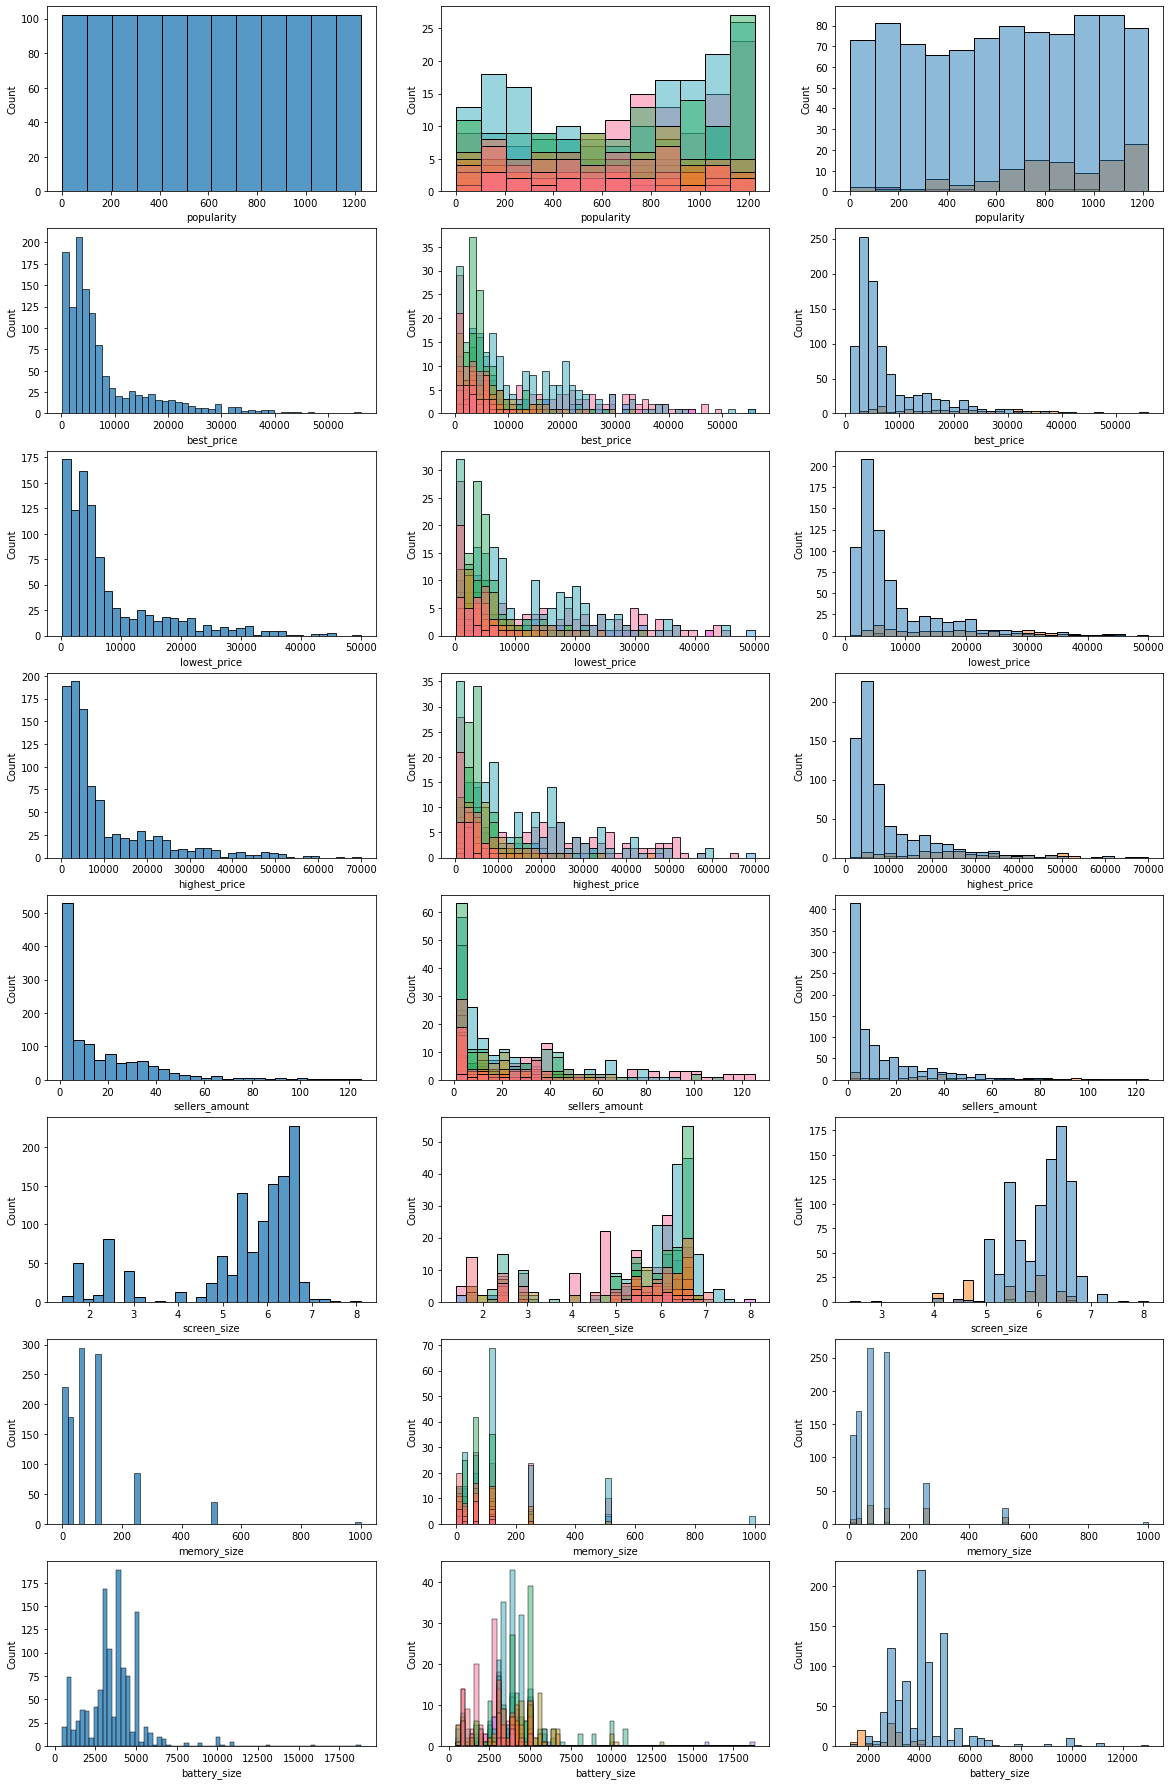

In [16]:
n_row = -1

# Setup a grid of (no. of rows, no. of plots on a row) with figure size
fig, ax = plt.subplots(len(numericals), 1 + len(categoricals), figsize=(WIDTH, HEIGHT * (2 + len(categoricals))))

# Plot the figure for numericals
for numerical in numericals:
    # Increment
    n_col = 0
    n_row += 1
    
    # Single distribution plotting
    plot_numerical(mobiles, numerical, categorical=None, ax=ax, n_row=n_row, n_col=n_col)
    n_col += 1
    
    # Distribution plotting by category
    for categorical in categoricals:
        plot_numerical(mobiles, numerical, categorical=categorical, ax=ax, n_row=n_row, n_col=n_col)
        n_col += 1

# Display the plot
plt.show()


### Plot pairing

### By os

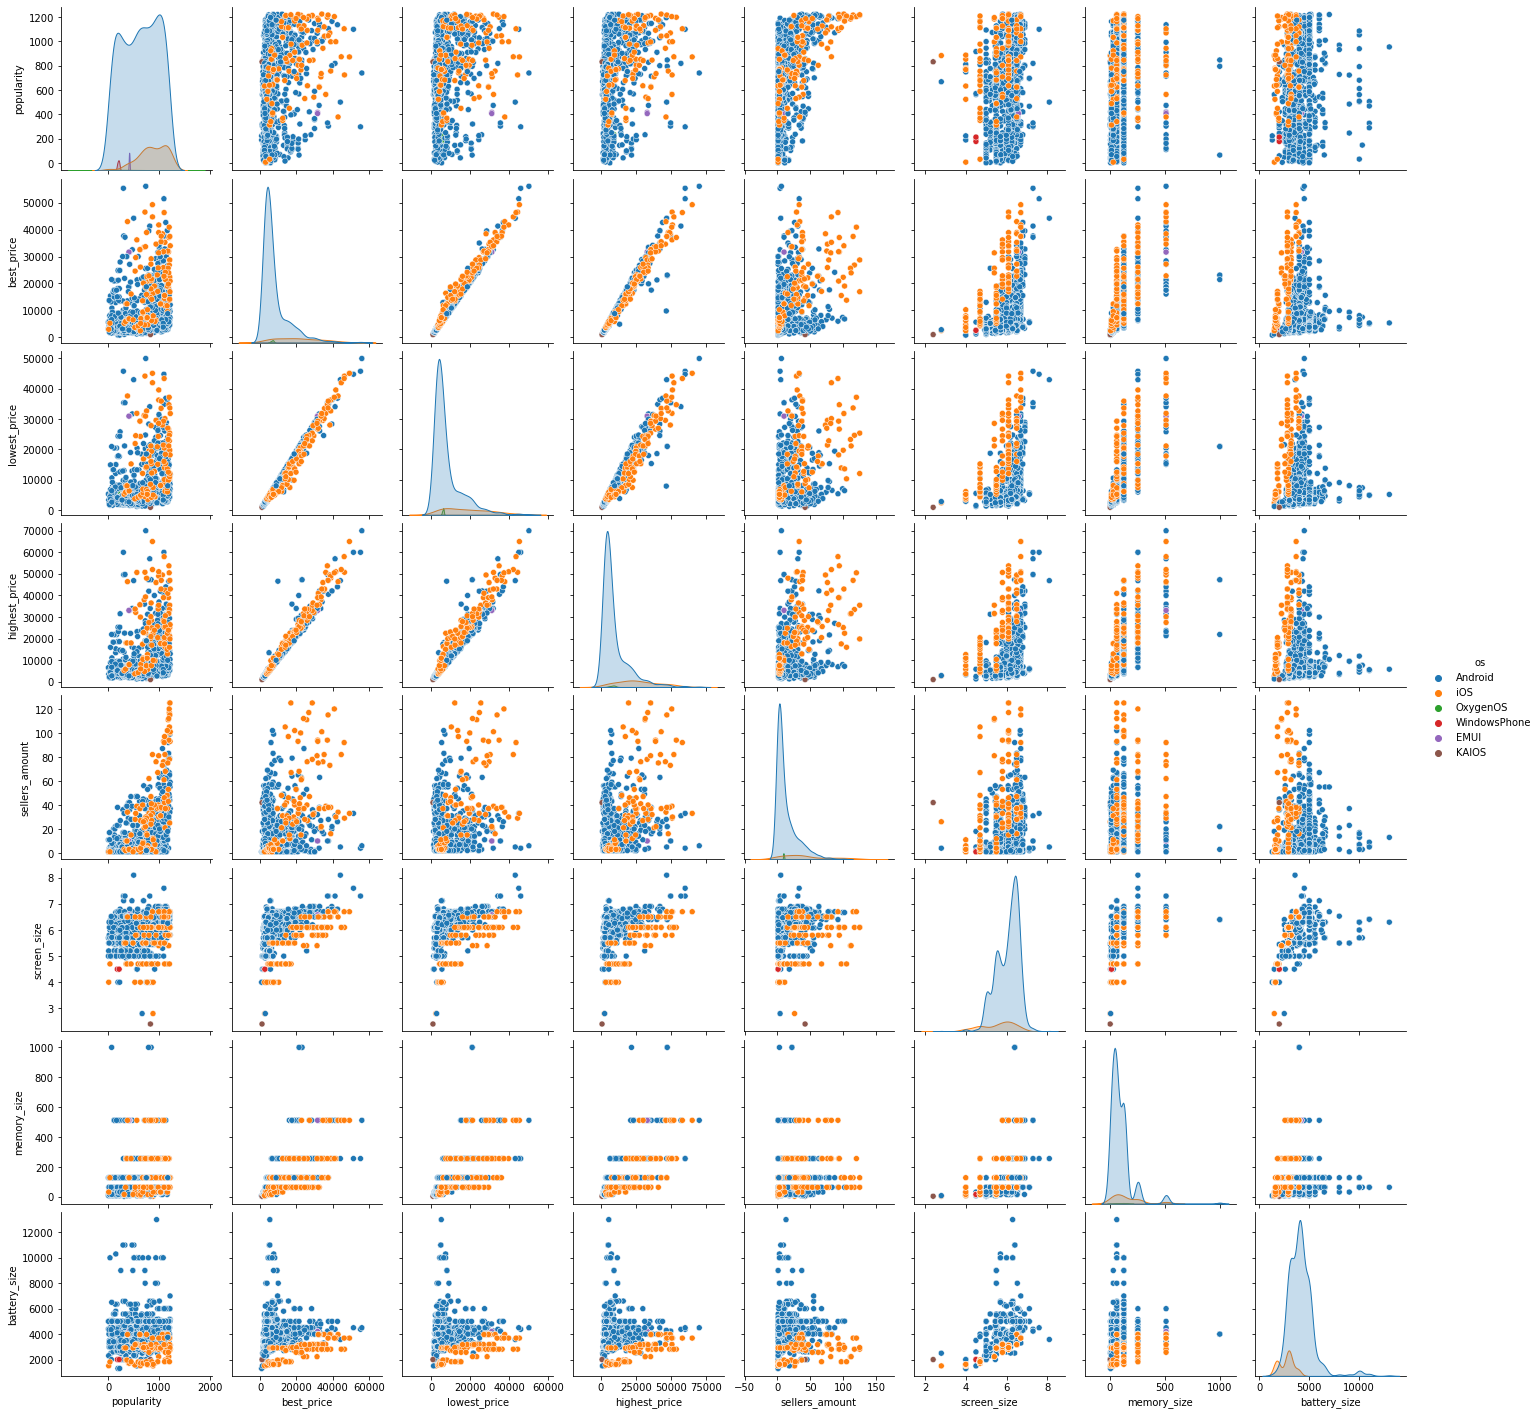

In [17]:
by_col = 'os'

sns.pairplot(mobiles[numericals + [by_col]], hue=by_col)
plt.show()


### By Brand

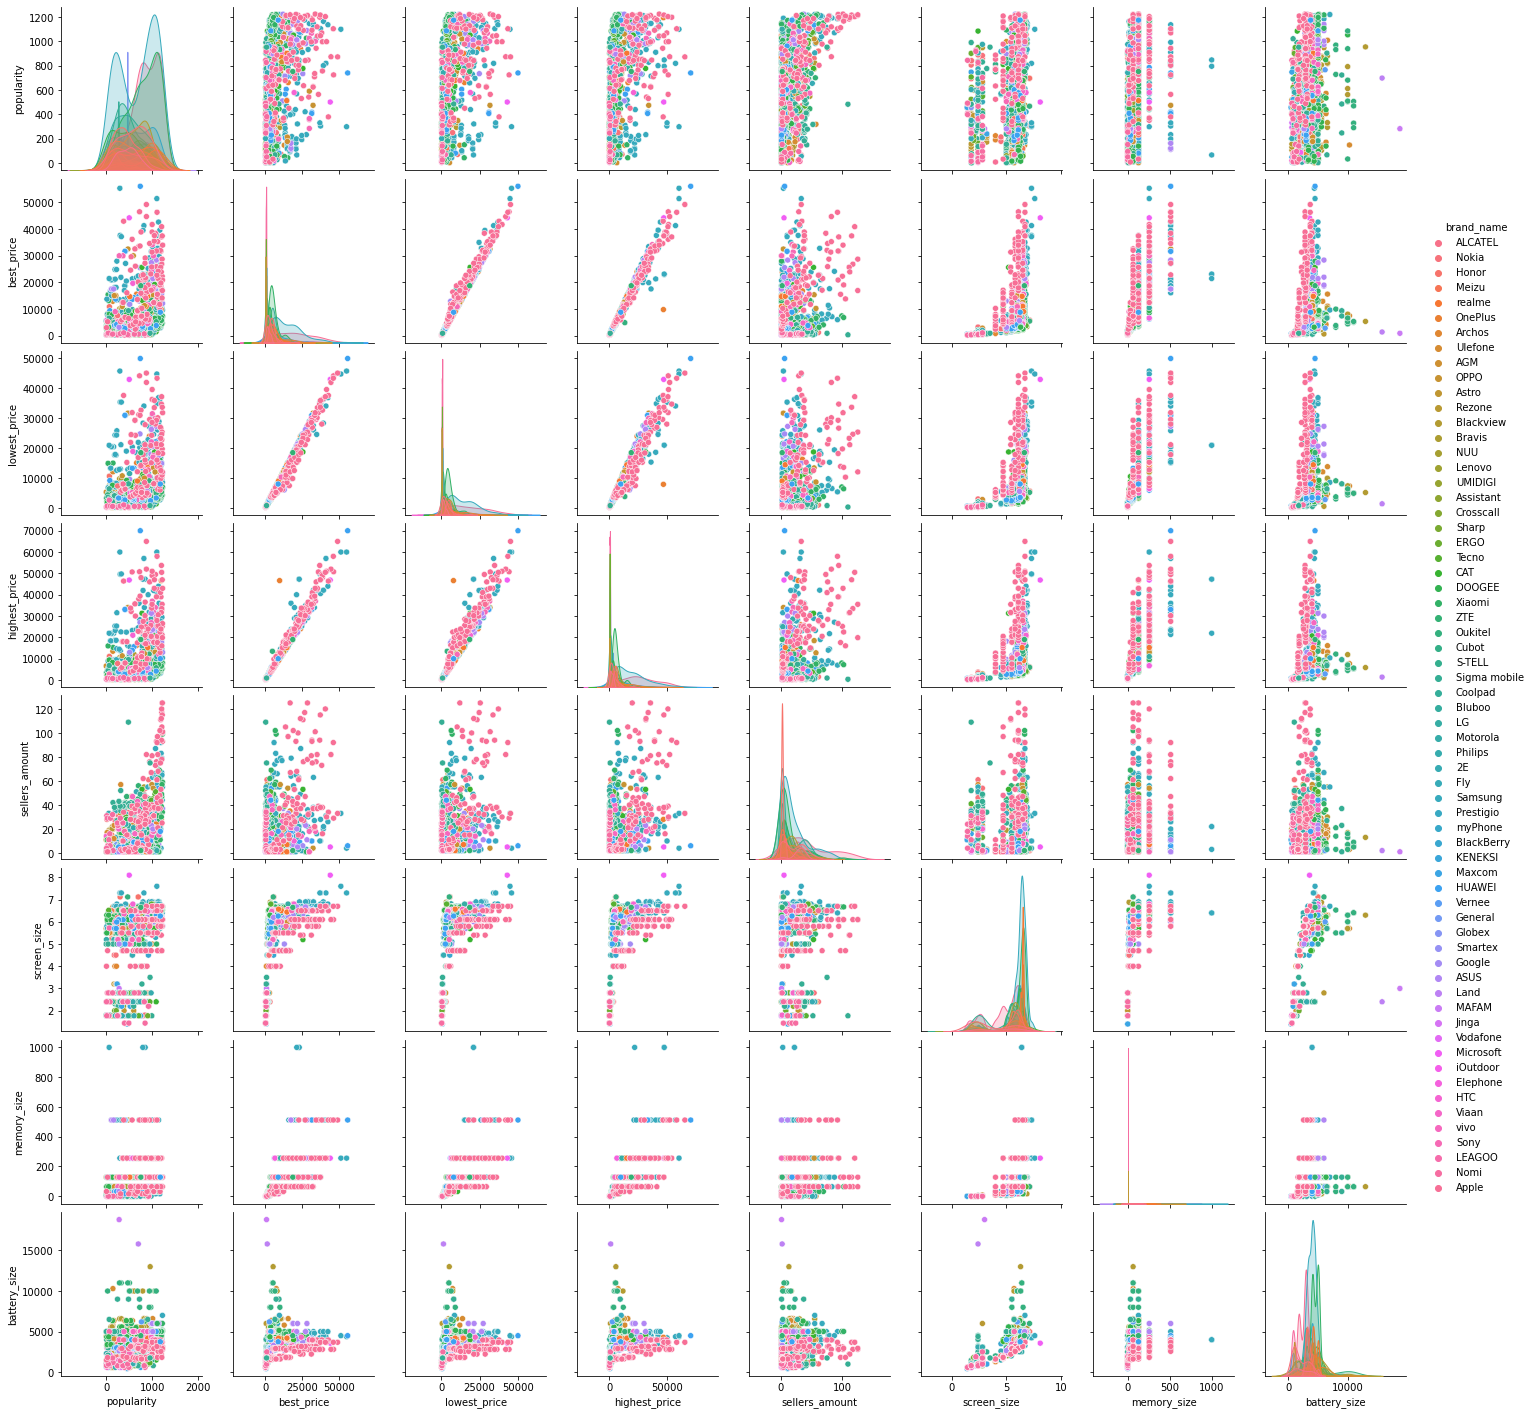

In [18]:
by_col = 'brand_name'

sns.pairplot(mobiles[numericals + [by_col]] , hue = by_col)
plt.show()

## 2 . Categorical variables

### Function

In [19]:
def plot_categorical(frame, column):
    # Count plot
    sns.countplot(frame[column])

### Analysis

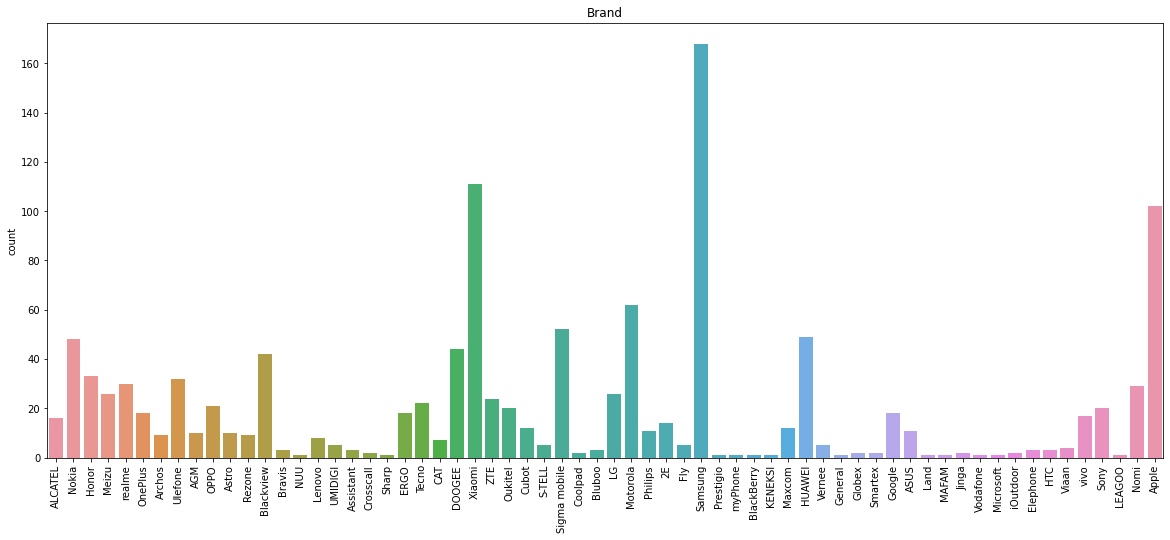

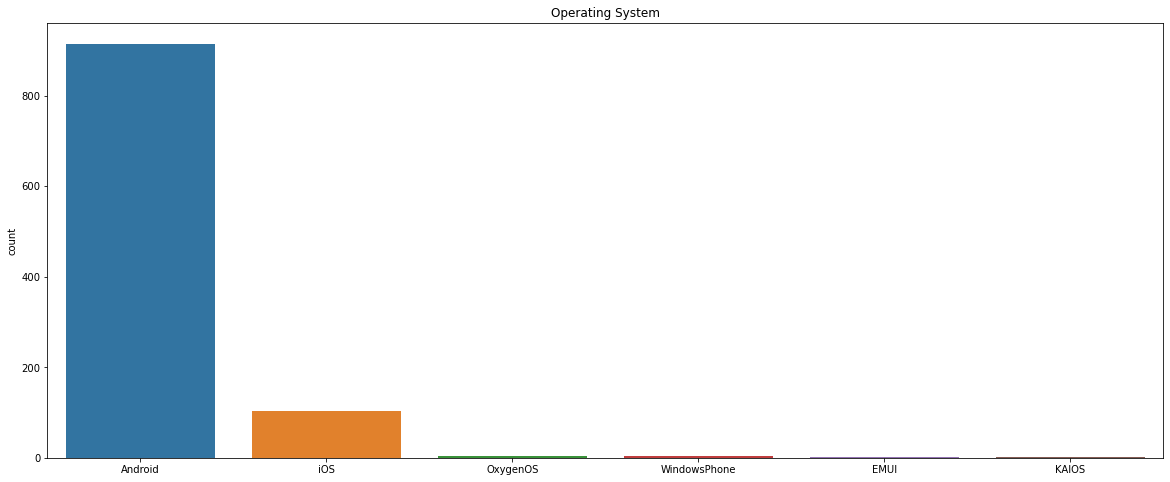

In [20]:
titles = ['Brand', 'Operating System']

for categorical, title in zip(categoricals, titles):
    plt.figure(figsize=(WIDTH, HEIGHT))
    plot_categorical(mobiles, categorical)
    plt.title(title)
    
    if title == 'Brand':
        plt.xticks(rotation=90)

    plt.xlabel('')
    plt.show()

## 3. Time Series

### Date interval

In [21]:
earliest = mobiles['release_date'].min().strftime("%B %d, %Y")
latest   = mobiles['release_date'].max().strftime("%B %d, %Y")

print(f"Release dates are between {earliest} and {latest}")

Release dates are between January 01, 2013 and February 01, 2021


### Prices evolution

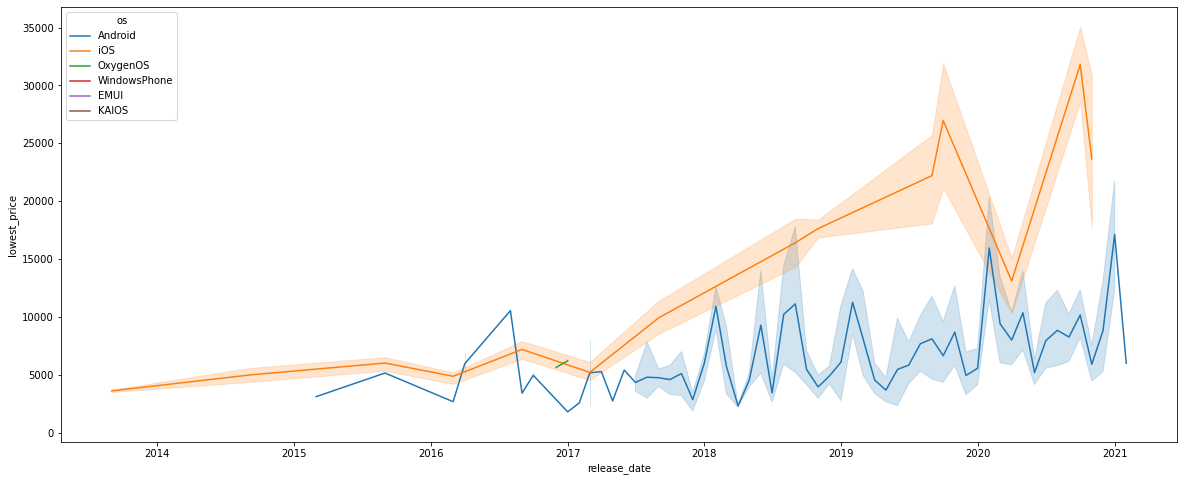

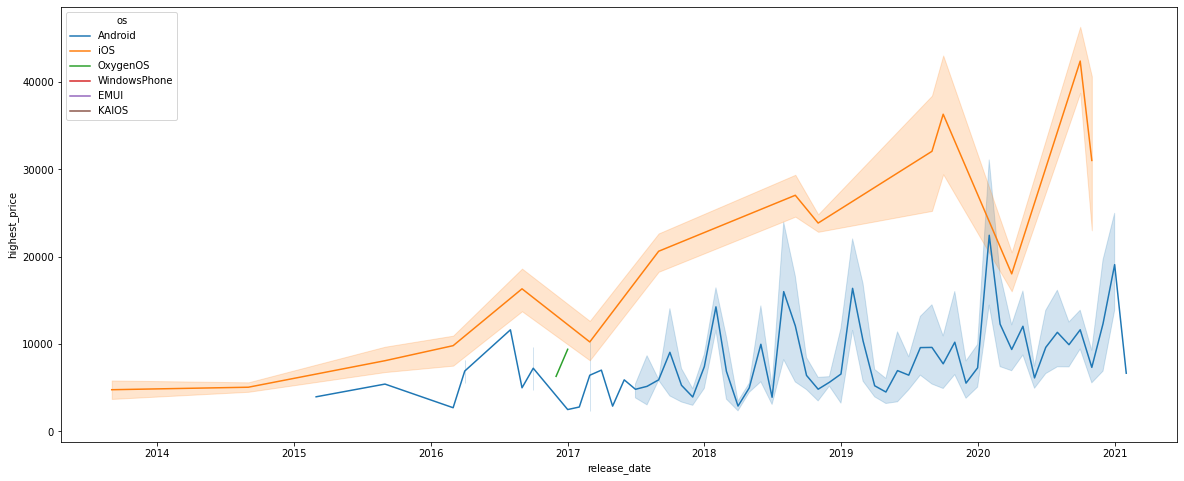

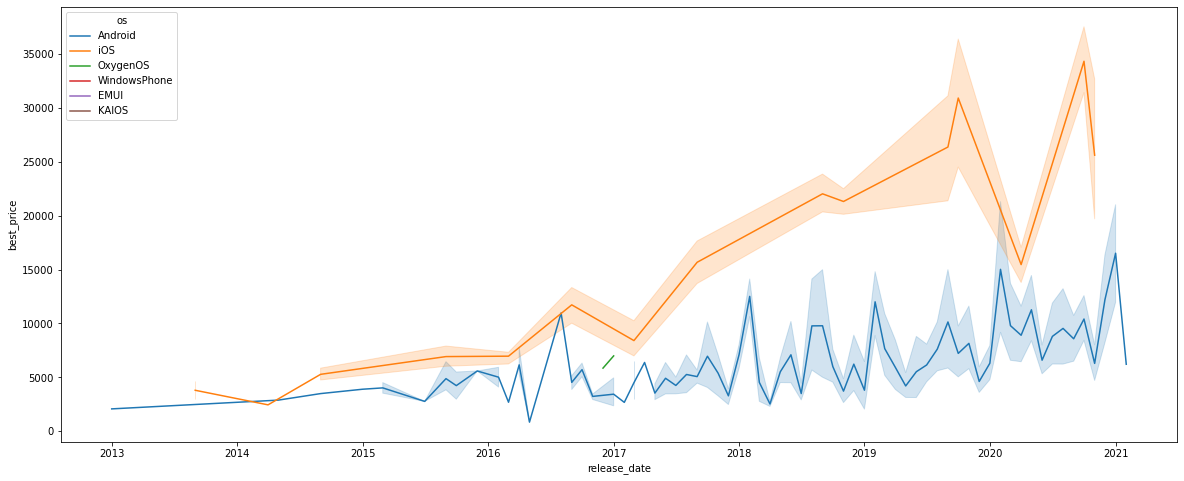

In [22]:
for price in [ f"{e}_price" for e in ['lowest', 'highest', 'best']]:
    plt.figure(figsize=(WIDTH, HEIGHT))
    sns.lineplot(data=mobiles, x='release_date', y=price, hue='os')
    plt.show()

### Other Analysis

In [23]:
def print_phone(phone):
    space = 30
    print(f"{'Name'.rjust(space)} : {phone['model_name']}")
    print(f"{'Price'.rjust(space)} : [{phone['lowest_price']}; {phone['highest_price']}]")
    print(f"{'Popularity'.rjust(space)} : {phone['popularity']}")
    print(f"{'Brand (OS)'.rjust(space)} : {phone['brand_name']} ({phone['os']})")

#### Top 5 high price phones

In [24]:
for i in range(5):
    phone = mobiles.nlargest(5, 'highest_price').join(mobiles_names[mobiles.nlargest(5, 'highest_price').index]).iloc[i]
    print_phone(phone)
    print()

                          Name : Mate Xs 8/512GB Interstellar blue (51095CSQ)
                         Price : [49999.0; 69999.0]
                    Popularity : 740
                    Brand (OS) : HUAWEI (Android)

                          Name : iPhone 12 Pro Max 512GB Dual Sim Pacific Blue (MGCE3)
                         Price : [45120.0; 64999.0]
                    Popularity : 872
                    Brand (OS) : Apple (iOS)

                          Name : Galaxy Fold 12/256GB Black
                         Price : [45799.0; 59999.0]
                    Popularity : 298
                    Brand (OS) : Samsung (Android)

                          Name : Galaxy Z Fold2 12/256GB Mystic Black (SM-F916BZKQ)
                         Price : [44809.0; 59999.0]
                    Popularity : 1099
                    Brand (OS) : Samsung (Android)

                          Name : iPhone 12 Pro Max 512GB Pacific Blue (MGDL3)
                         Price : [43396.0; 57999.0]
   

#### Top 5 cheapest mobile phones

In [25]:
for i in range(5):
    phone = mobiles.nsmallest(5, 'highest_price').join(mobiles_names[mobiles.nsmallest(5, 'highest_price').index]).iloc[i]
    print_phone(phone)
    print()

                          Name : A144 Black/Red
                         Price : [199.0; 229.0]
                    Popularity : 519
                    Brand (OS) : Astro (nan)

                          Name : i144m Black
                         Price : [209.0; 229.0]
                    Popularity : 492
                    Brand (OS) : Nomi (nan)

                          Name : V182 Black
                         Price : [239.0; 259.0]
                    Popularity : 19
                    Brand (OS) : Viaan (nan)

                          Name : F188 Play DS Black
                         Price : [227.0; 289.0]
                    Popularity : 333
                    Brand (OS) : ERGO (nan)

                          Name : F188 Play DS Black
                         Price : [227.0; 289.0]
                    Popularity : 294
                    Brand (OS) : ERGO (nan)



# Modelling

In [26]:
data = mobiles.copy()

features = [
    'brand_name',
    'os',
    'popularity',
    'sellers_amount',
    'screen_size',
    'memory_size',
    'battery_size',
]

nums  = ['popularity', 'sellers_amount', 'screen_size', 'memory_size', 'battery_size']
cats  = ['brand_name', 'os']

TARGET = 'best_price'

#### Because the data looks more Gaussian in log scale we will predict the log scale of the target variable then we will put it to exponential for the real predictions

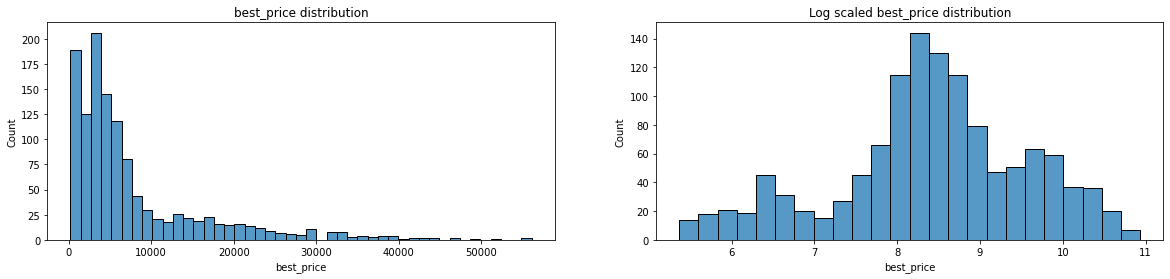

In [27]:
fig, ax= plt.subplots(1, 2, figsize=(WIDTH, HEIGHT/2))

sns.histplot(mobiles[TARGET], ax=ax[0])
ax[0].title.set_text(f'{TARGET} distribution')

sns.histplot(mobiles[TARGET].apply(np.log), ax=ax[1])
ax[1].title.set_text(f'Log scaled {TARGET} distribution')

plt.show()

In [28]:
data[TARGET] = data[TARGET].apply(np.log)

### 1. Pre processing

#### Date variable

In [29]:
data['release_date'] = data['release_date'].apply( lambda x: x.timestamp())

#### Numerical variables - Scaling/Normalizing

In [30]:
from sklearn.preprocessing import StandardScaler

# Init. the scaler
scaler = StandardScaler()

# Fitting the scaler to the data
scaled_data = scaler.fit_transform(data[nums])
data[nums]  = pd.DataFrame(columns=nums, data=scaled_data)

#### Numerical & Categorical variables - Imputation

In [31]:
data[cats] = data[cats].fillna('Unknown')


In [32]:
fill_data  = data.groupby(cats, sort=False)[nums].apply(lambda x: x.ffill().bfill())

data.loc[fill_data.index, nums] = fill_data

In [33]:
print(f"There are {data[nums].isna().sum().sum()} missing values which represents {round((data[nums].isna().sum().sum() / (data[nums].shape[0] * data[nums].shape[1])) * 100, 2)}% of the data.")

There are 28 missing values which represents 0.46% of the data.


In [34]:
data[nums] = data[nums].fillna(data[nums].median())

In [35]:
print(f"There are {data[nums].isna().sum().sum()} missing values which represents {round((data[nums].isna().sum().sum() / (data[nums].shape[0] * data[nums].shape[1])) * 100, 2)}% of the data.")

There are 0 missing values which represents 0.0% of the data.


#### Categorical variables - One-hot enconding

In [36]:
# One-hot encoding
oh_cats = pd.get_dummies(data[cats])

# Concatenate the on-hot encoded categorial variables to the data frame
data = pd.concat([
    data.drop(columns=cats),
    oh_cats
], axis=1)

# Correct features
for cat in cats:
    if cat in features:
        features.remove(cat)
        
features = features + oh_cats.columns.tolist()

In [37]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

SEED  = 42

def modelling(X, y, model, f_importance=False, fit=False):
    # Type of modelling : Train & Test basic splitting
    importance, tt_train_score, tt_test_score  = train_test_model(X, y, model, f_importance=f_importance)
    
    # Type of modelling : KFold Train & Test splitting
    kf_train_score, kf_test_score = kfold_model(X, y, model)
    
    if fit:
        model.fit(X, y)
        return model, tt_test_score, kf_test_score
    
    return (importance, tt_train_score, tt_test_score, kf_train_score, kf_test_score) if f_importance else (tt_train_score, tt_test_score, kf_train_score, kf_test_score)

def train_test_model(X, y, model, f_importance=True):
    
    importance = None
    
    # Train & test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)
    
    # Fitting
    model.fit(X_train, y_train)
    
    # Scores
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    
    train_score = mean_squared_error(y_train, model.predict(X_train))
    test_score = mean_squared_error(y_test, model.predict(X_test))
    
    # Feature importances
    if f_importance:
        try:
            try:
                importance = model.feature_importances_
            except:
                try:
                    importance = model.coef_
                except:
                    pass
            
            features   = X.columns.tolist()
            importance = pd.Series(index=features, data=importance)
            return importance, train_score, test_score
        except:
            pass
        
    # Model, RMSE on train, RMSE on test
    return importance, train_score, test_score

def kfold_model(X, y, model):
    # Parameters & variables
    K            = 5
    kf           = KFold(K)
    train_scores = list() 
    test_scores  = list() 
    
    # Looping over the folds
    for train_index, test_index in kf.split(X):
        
        # Define datasets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fitting
        model.fit(X_train, y_train)
        
        # Scores
        train_pred = model.predict(X_train)
        test_pred  = model.predict(X_test)
        
        train_score = mean_squared_error(y_train, model.predict(X_train))
        test_score = mean_squared_error(y_test, model.predict(X_test))
        
        # Increments
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    kf_train_score = np.mean(train_scores)
    kf_test_score  = np.mean(test_scores)
    
    return kf_train_score, kf_test_score

In [38]:
# Classic linear regressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

# Regressors with variable selection
from sklearn.linear_model import ElasticNet, Lars, Lasso, LassoLars

# Bayesian regressor
from sklearn.linear_model import ARDRegression, BayesianRidge

# XGBoost
from xgboost import XGBRegressor

models = [
    LinearRegression(),
    Ridge(),
    SGDRegressor(),
    ElasticNet(),
    Lars(),
    LassoLars(),
    ARDRegression(),
    BayesianRidge(),
    XGBRegressor()
]

In [39]:
result_cols = ['name', 'basic_train', 'basic_test', 'kf_train', 'kf_test']
importances = dict()

# Model analysis DataFrame
model_analysis = pd.DataFrame(columns=result_cols)

# Splitting X & y
X = data[features]
y = data[TARGET]

for model in models:
    print(f"{type(model).__name__.rjust(20)}...", end='')
    
    # Function for modelling
    importance, tt_train_score, tt_test_score, kf_train_score, kf_test_score = modelling(X, y, model, f_importance=True, fit=False)
    
    # Add data from modelling
    model_analysis = model_analysis.append(
        pd.Series(
            index=result_cols, 
            data=np.array([
                type(model).__name__,
                tt_train_score,
                tt_test_score,
                kf_train_score,
                kf_test_score
            ])), 
        ignore_index=True)
    
    # Add data for importance analysis
    importances[type(model).__name__] = importance
    print(f" ended !")

    LinearRegression... ended !
               Ridge... ended !
        SGDRegressor... ended !
          ElasticNet... ended !
                Lars... ended !
           LassoLars... ended !
       ARDRegression... ended !
       BayesianRidge... ended !
        XGBRegressor... ended !


In [40]:
print('Ranking based on test RSME : ')
print()
print(model_analysis[['name', 'basic_test', 'kf_test']].sort_values(by=['basic_test'], ascending=True))

Ranking based on test RSME : 

               name             basic_test                 kf_test
8      XGBRegressor     0.0842336731304193     0.31616436411361076
7     BayesianRidge    0.15882249190966694      0.4280813240366541
1             Ridge     0.1592417555117898      0.4281966289298641
4              Lars    0.15938197366816498  2.1352900882702663e+30
6     ARDRegression    0.16024465504146787      0.4040570676418679
2      SGDRegressor     0.2743928826101585      1.6805075011294757
3        ElasticNet     0.7794349643271858      0.9028781920010932
5         LassoLars     1.2892951426294423      1.3993872940449819
0  LinearRegression  1.571370021589133e+21   8.118718633766806e+21


In [41]:
print('Ranking based on cross validation test RSME : ')
print()
print(model_analysis[['name', 'basic_test', 'kf_test']].sort_values(by=['kf_test'], ascending=True))

Ranking based on cross validation test RSME : 

               name             basic_test                 kf_test
8      XGBRegressor     0.0842336731304193     0.31616436411361076
6     ARDRegression    0.16024465504146787      0.4040570676418679
7     BayesianRidge    0.15882249190966694      0.4280813240366541
1             Ridge     0.1592417555117898      0.4281966289298641
3        ElasticNet     0.7794349643271858      0.9028781920010932
5         LassoLars     1.2892951426294423      1.3993872940449819
2      SGDRegressor     0.2743928826101585      1.6805075011294757
4              Lars    0.15938197366816498  2.1352900882702663e+30
0  LinearRegression  1.571370021589133e+21   8.118718633766806e+21


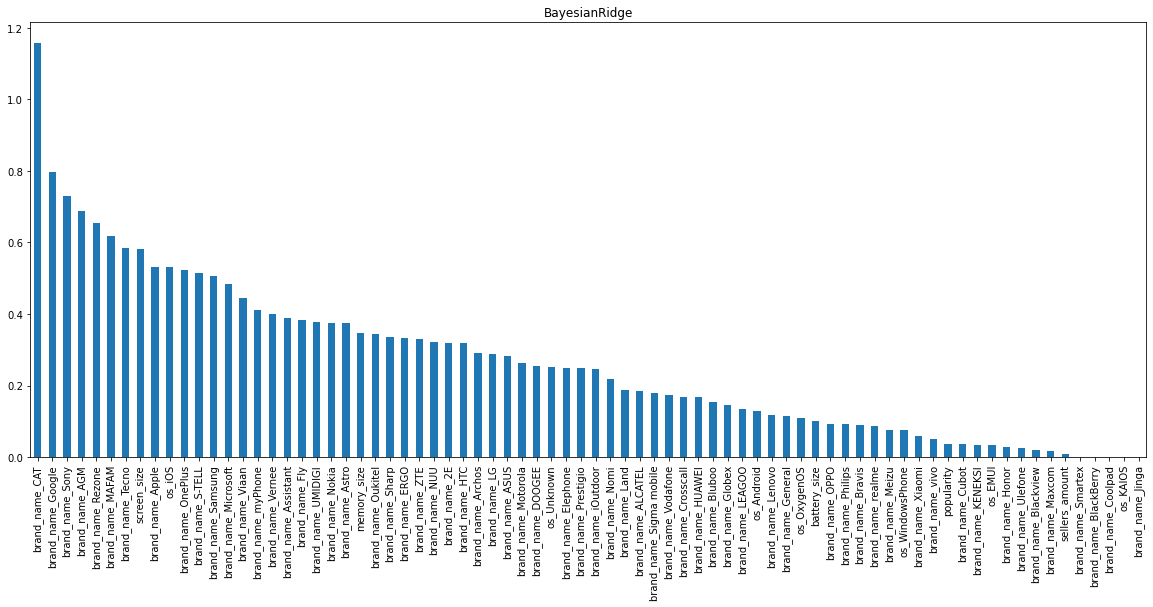

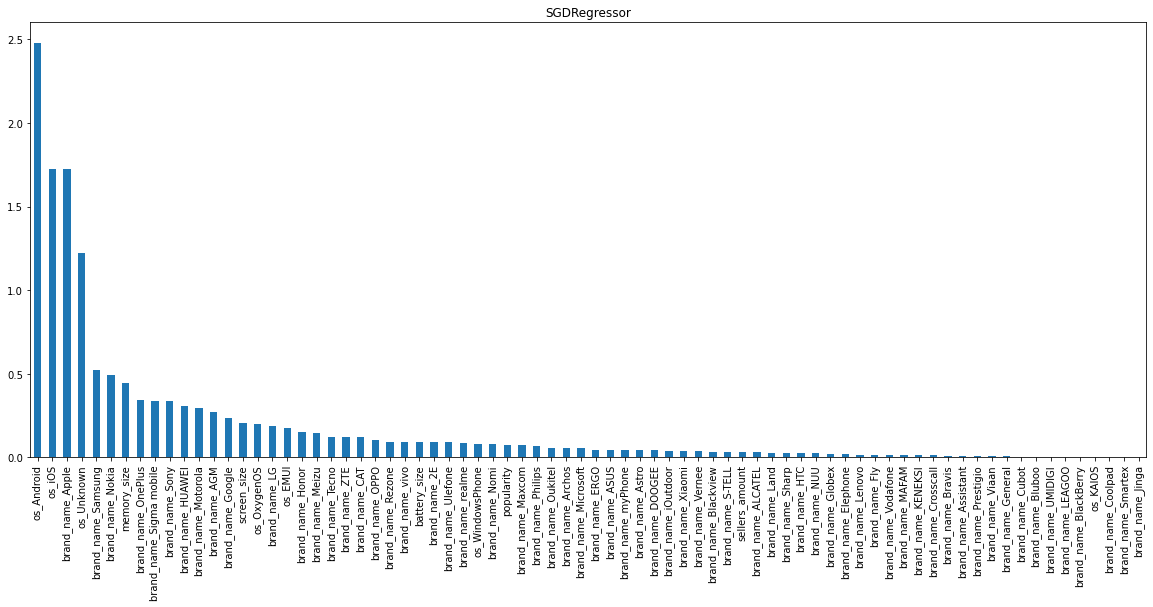

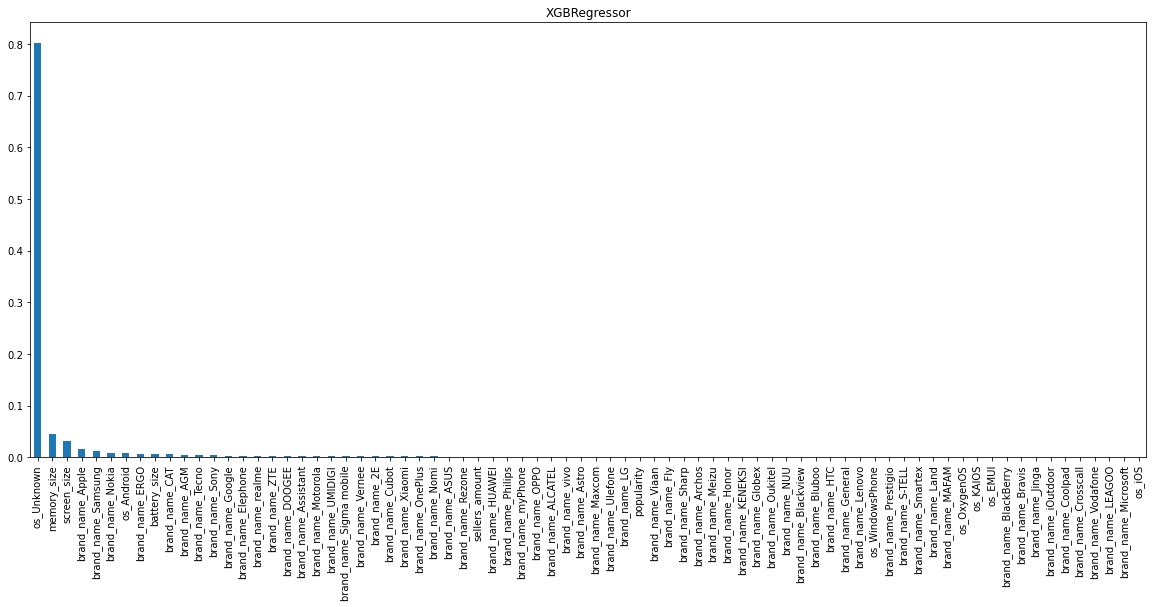

In [42]:
def plot_importance(series):
    # Sort values
    data = series.apply(np.abs).sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(WIDTH, HEIGHT))
    data.plot(kind='bar')
    plt.title(data.name)
    plt.show()

_ = pd.DataFrame.from_dict(importances)[['BayesianRidge', 'SGDRegressor', 'XGBRegressor']].apply(lambda x: plot_importance(x), axis=0)

### Predictions analysis

In [43]:
data[TARGET]

0        7.432484
1        7.497207
2        7.497207
3        7.497207
4        7.600402
          ...    
1219    10.029459
1220    10.110502
1221     9.082961
1222     9.839216
1223     6.810142
Name: best_price, Length: 1224, dtype: float64

In [44]:
# Model init
model = XGBRegressor()

# Training
_ = model.fit(X, y)

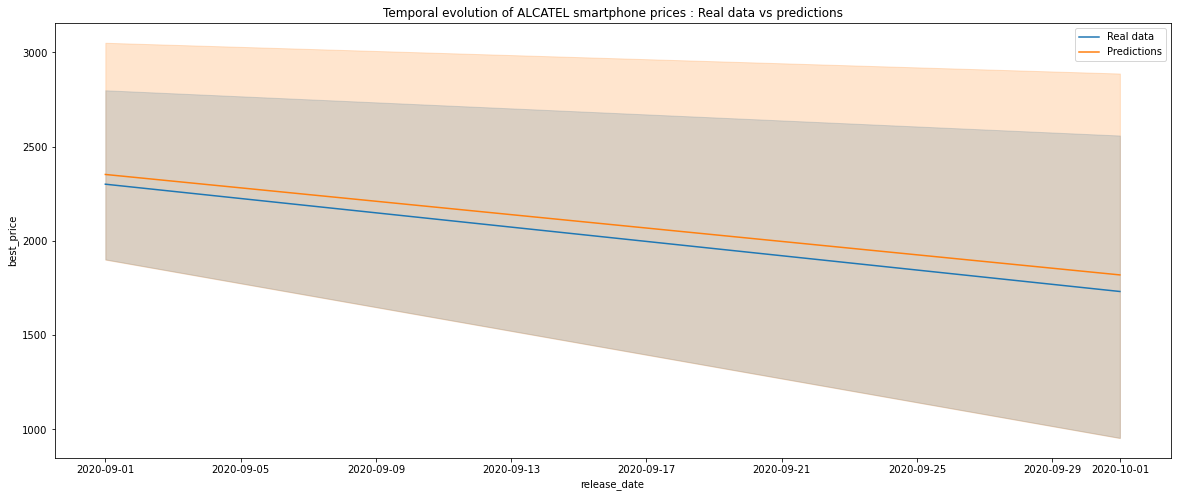

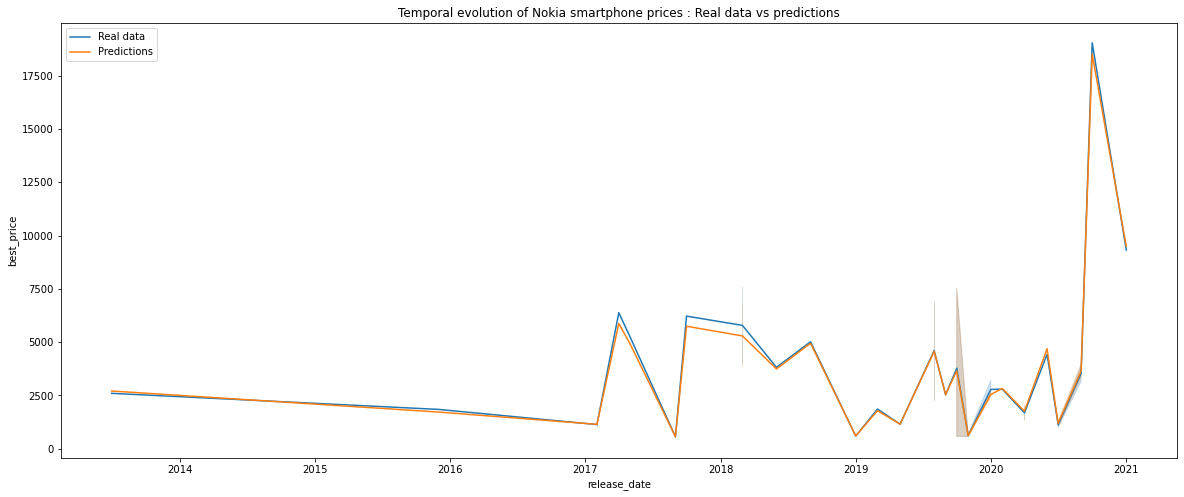

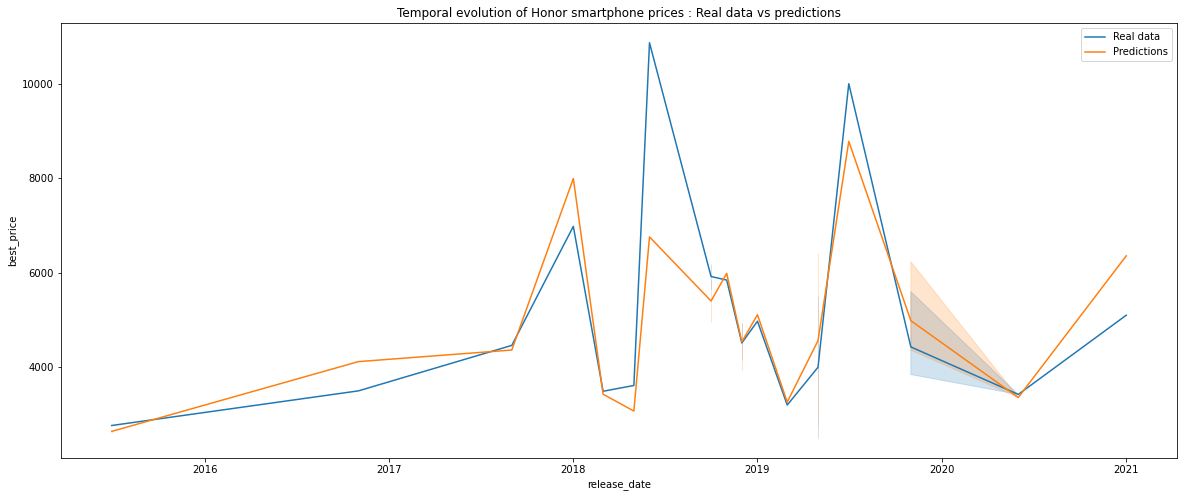

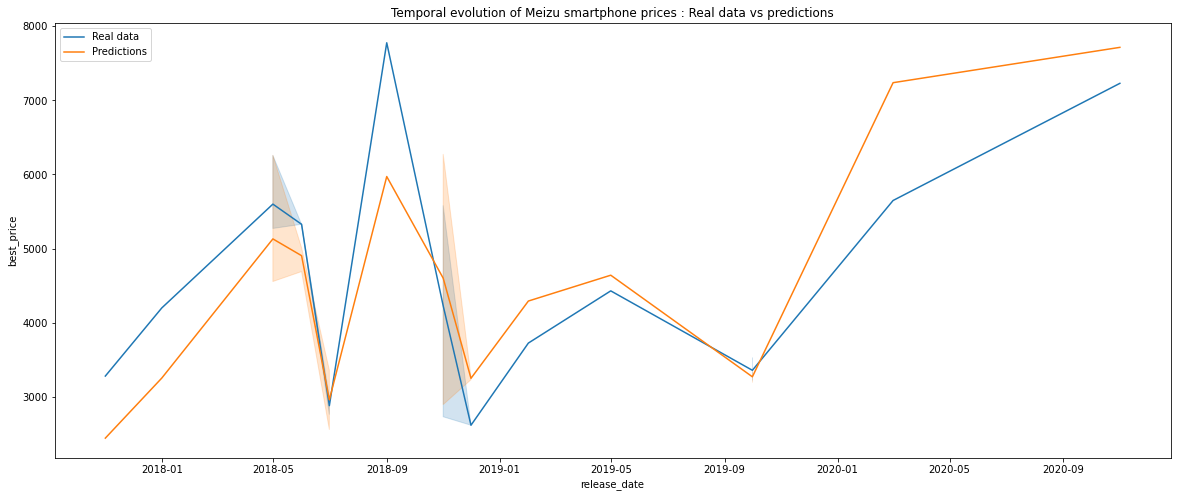

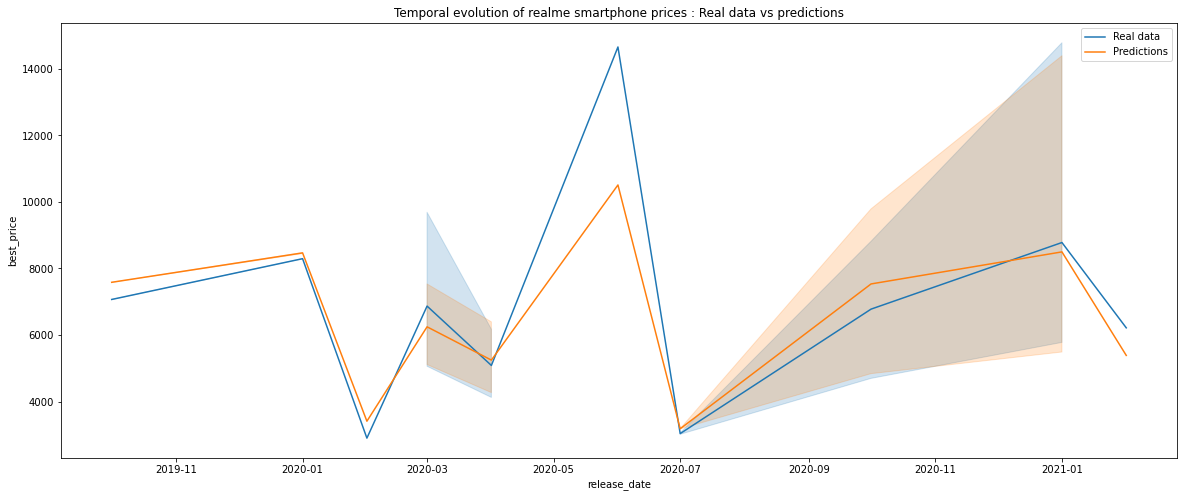

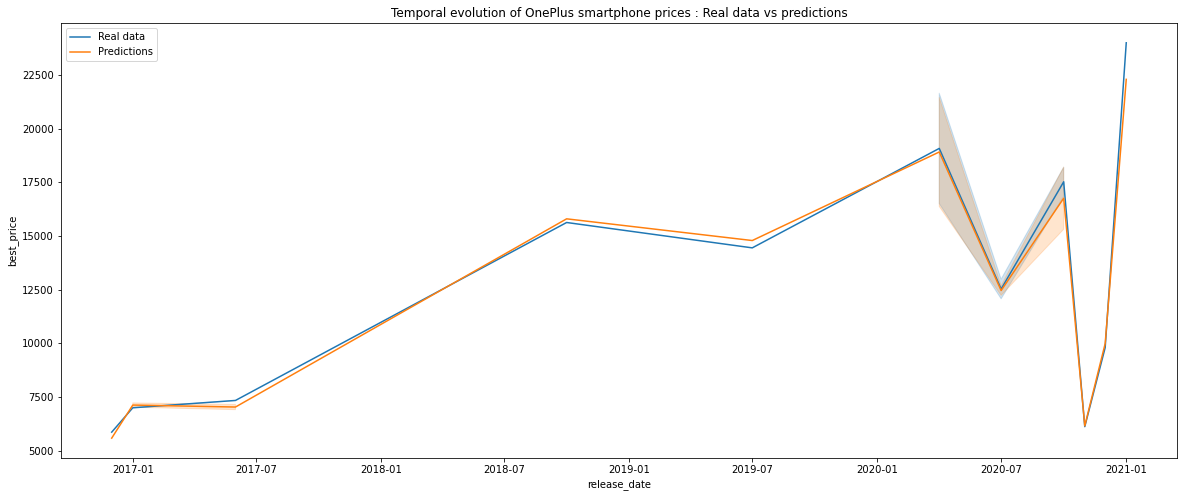

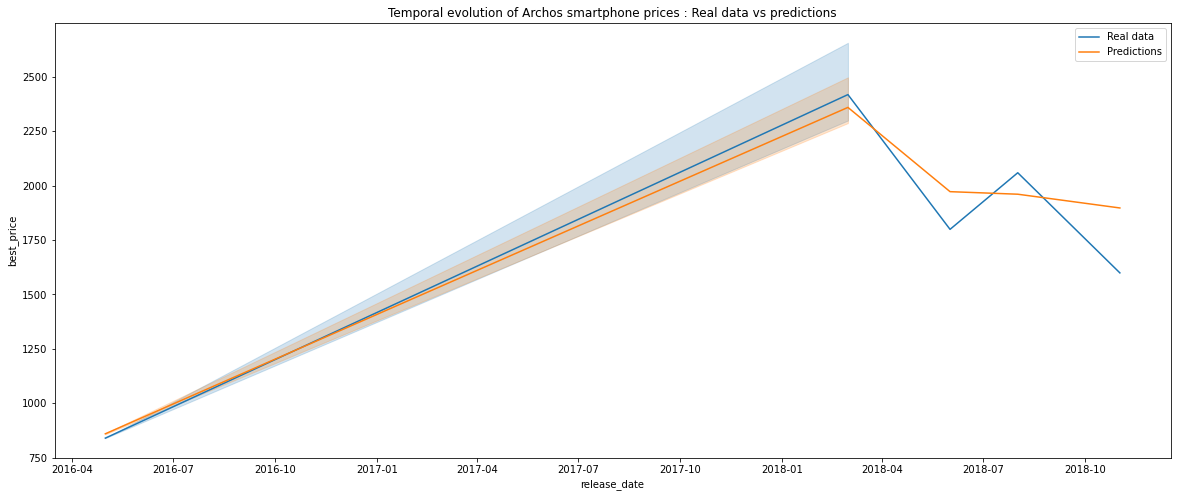

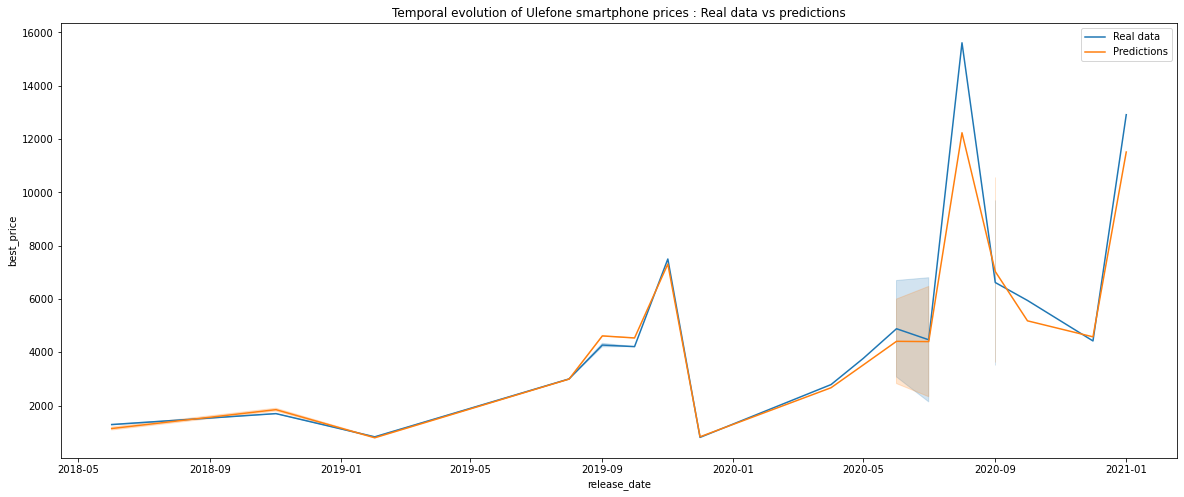

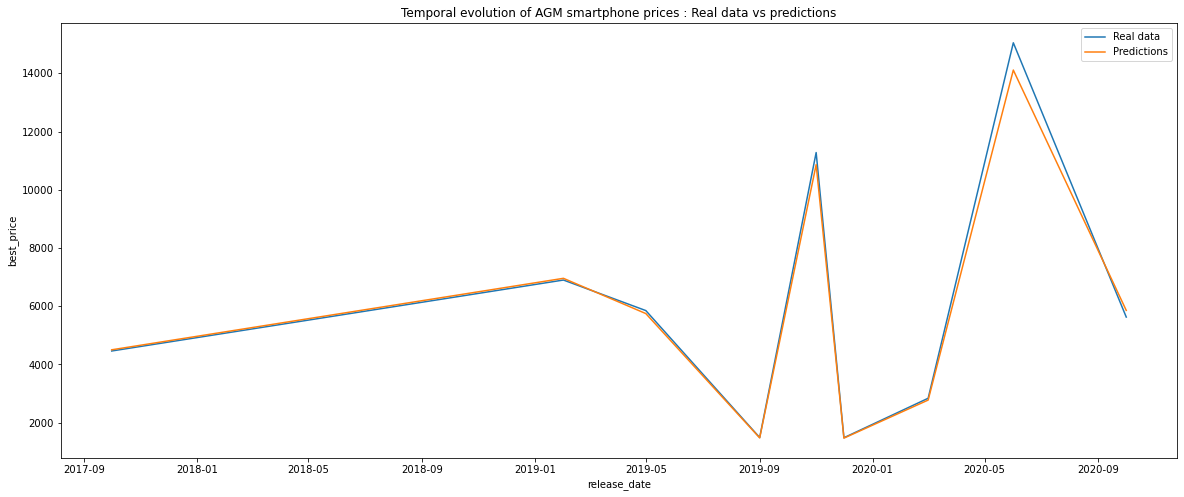

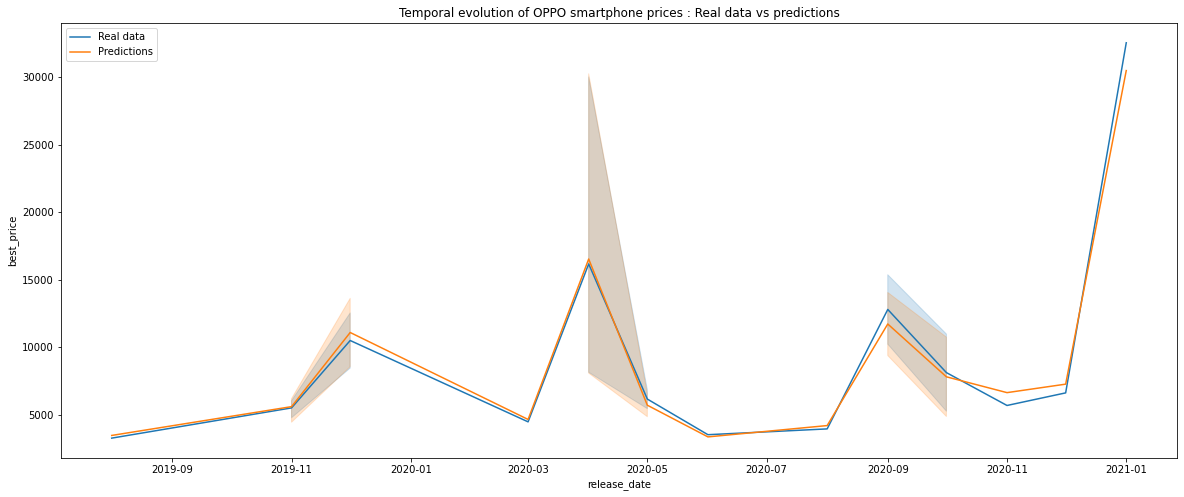

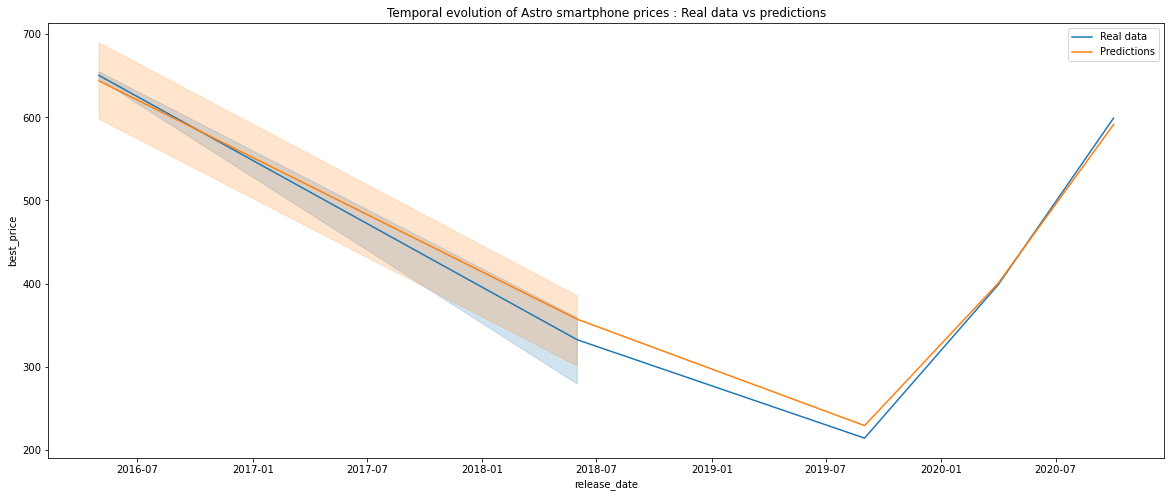

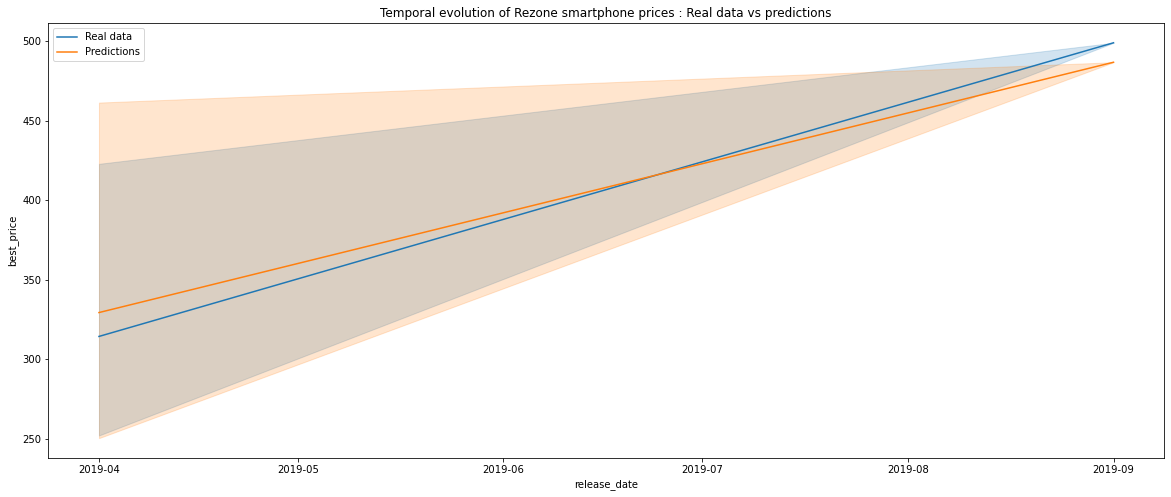

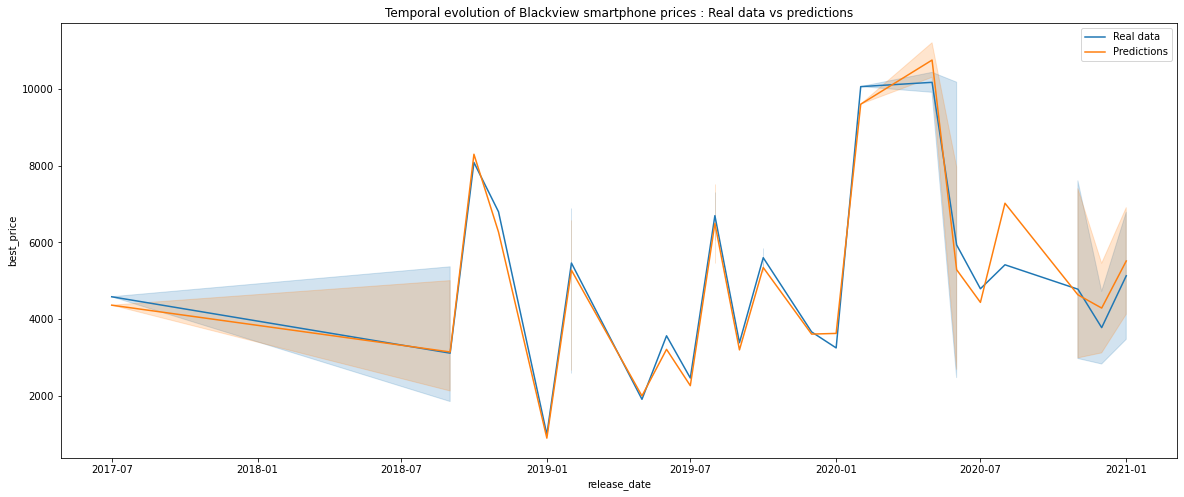

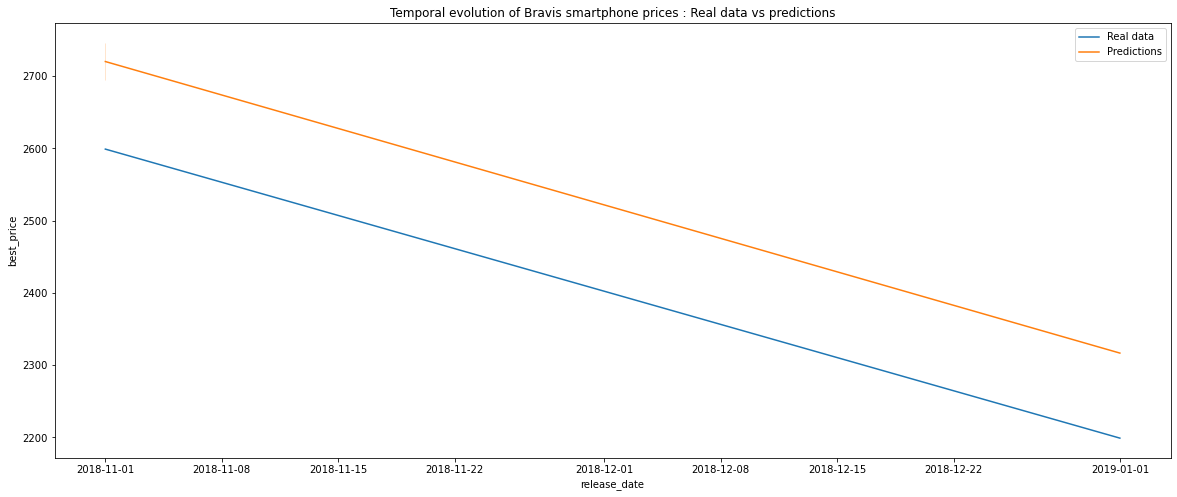

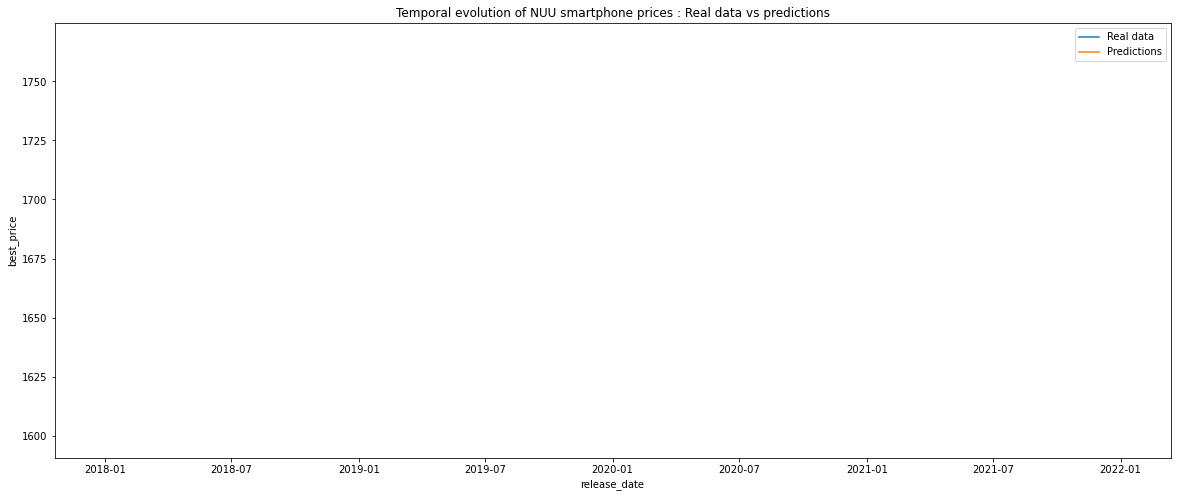

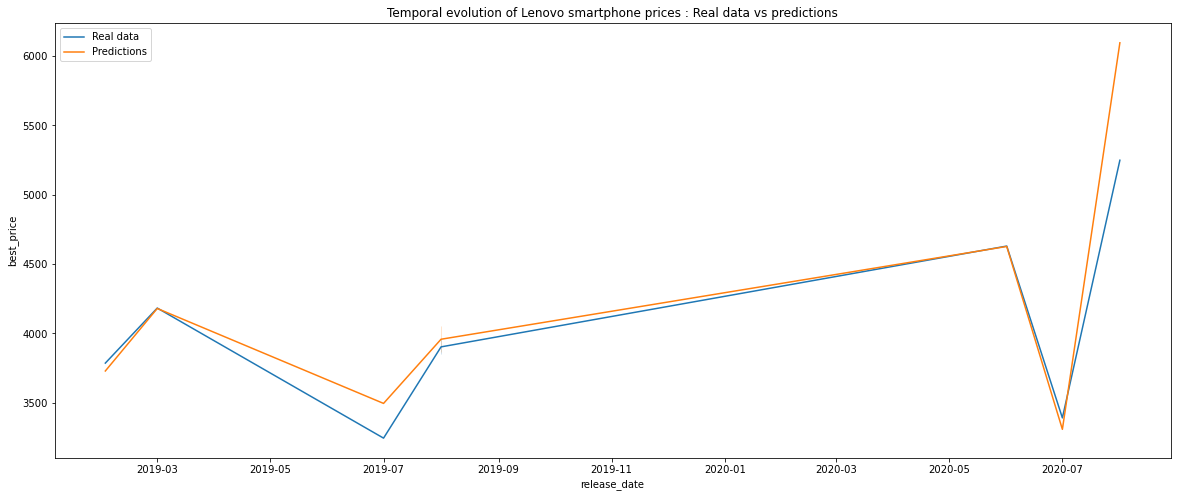

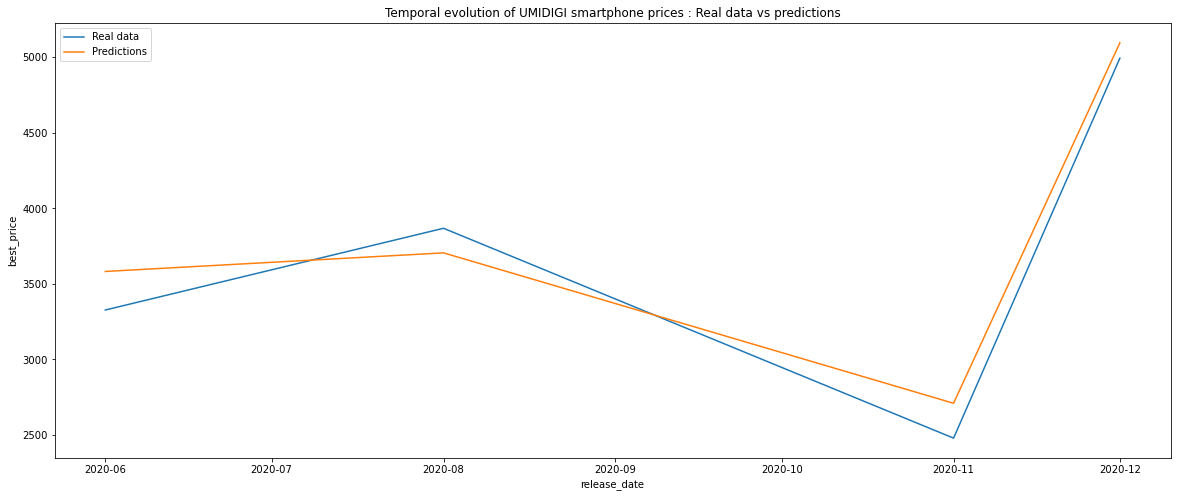

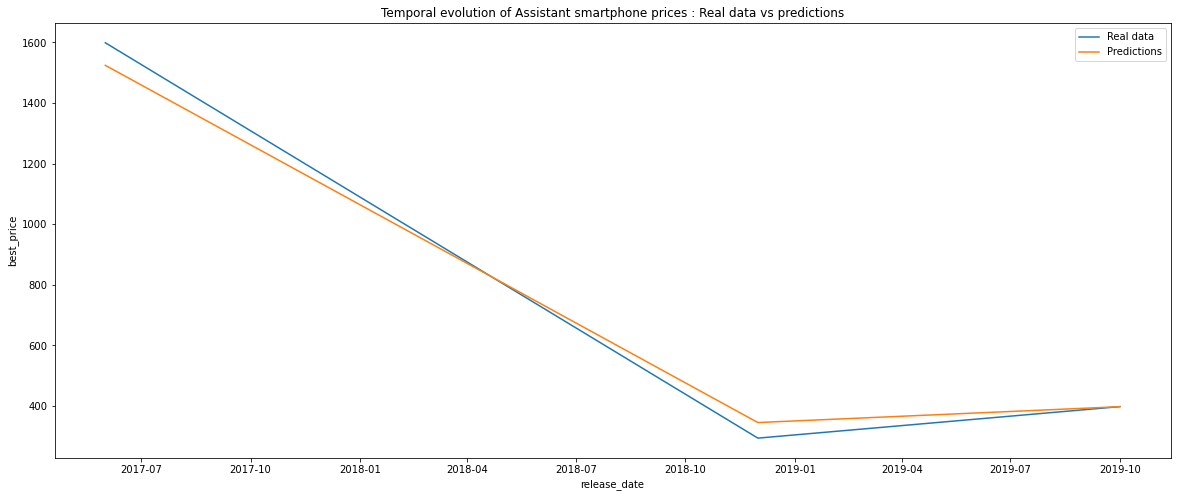

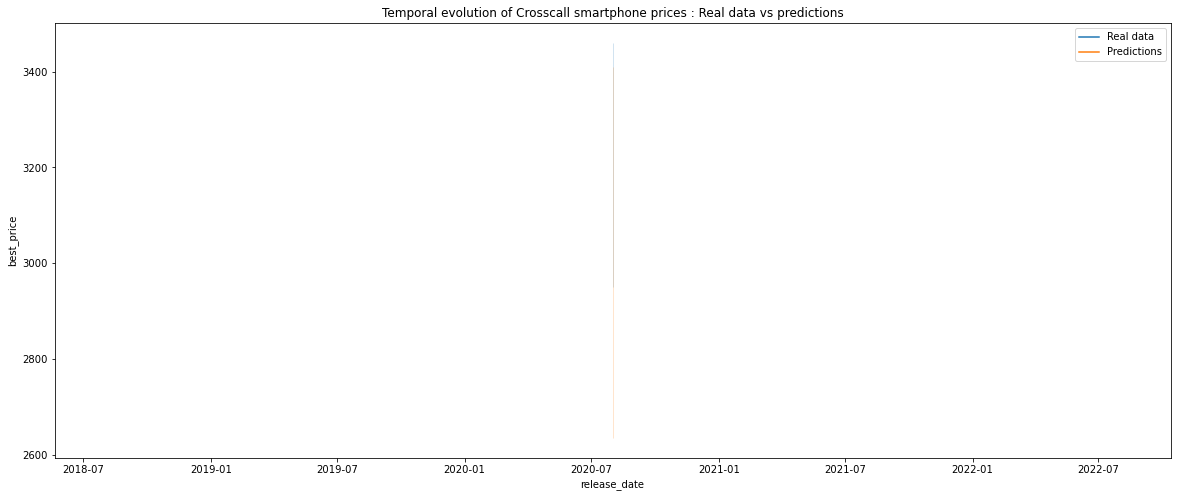

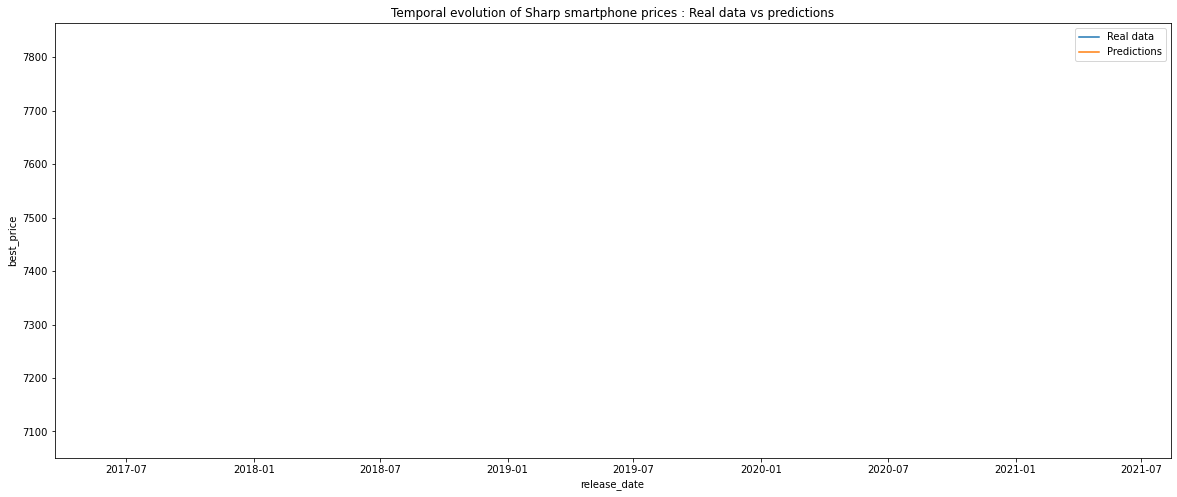

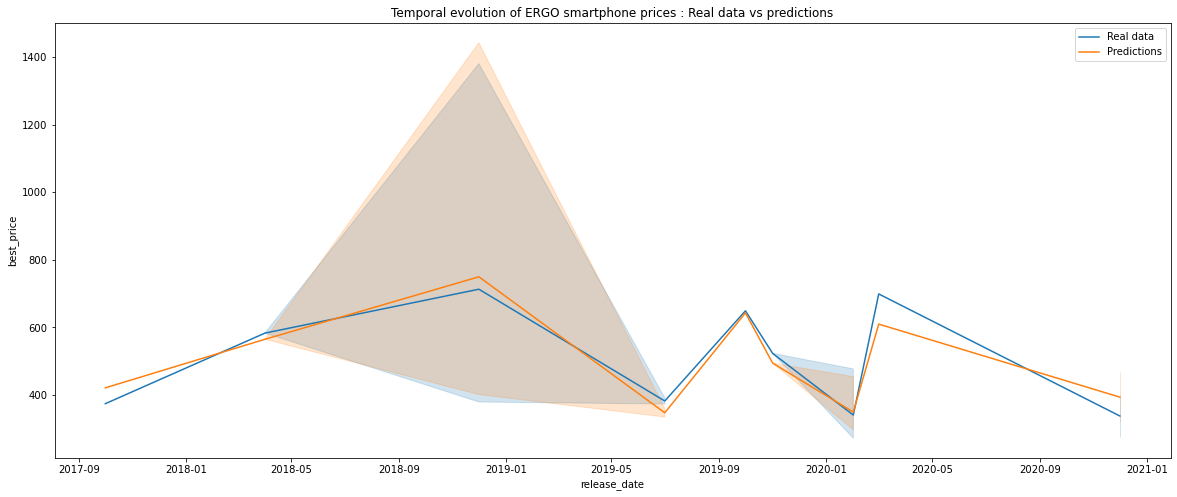

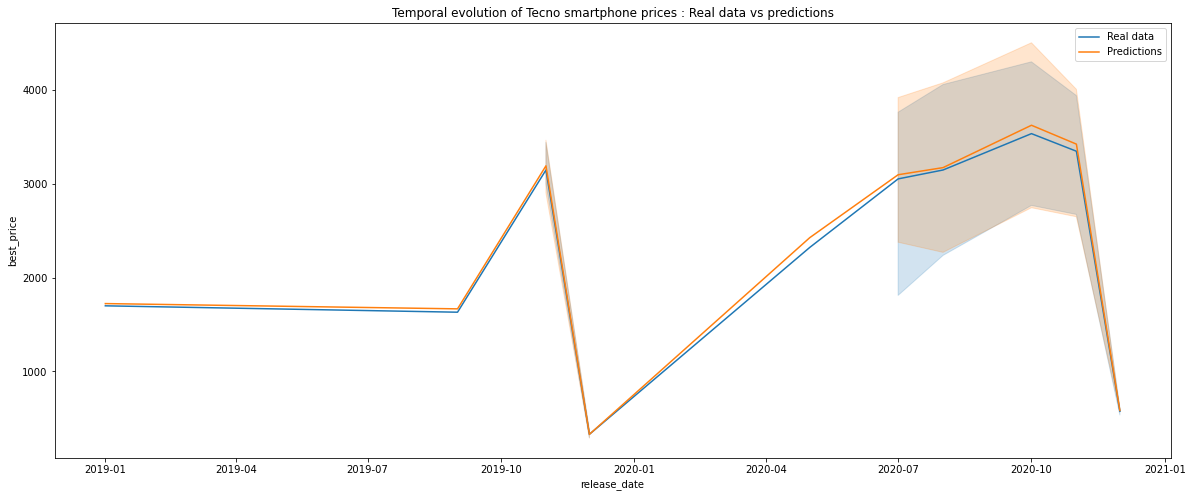

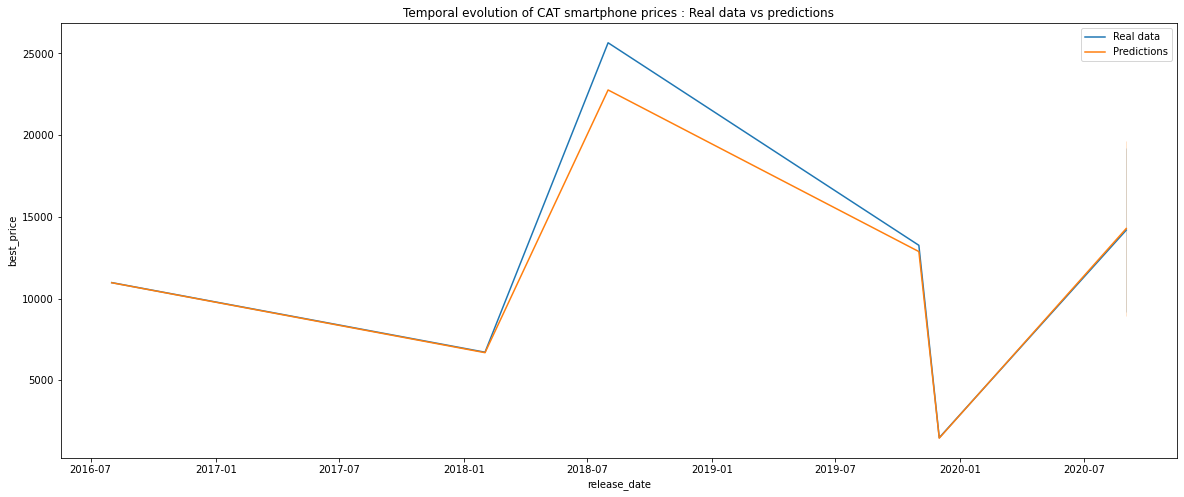

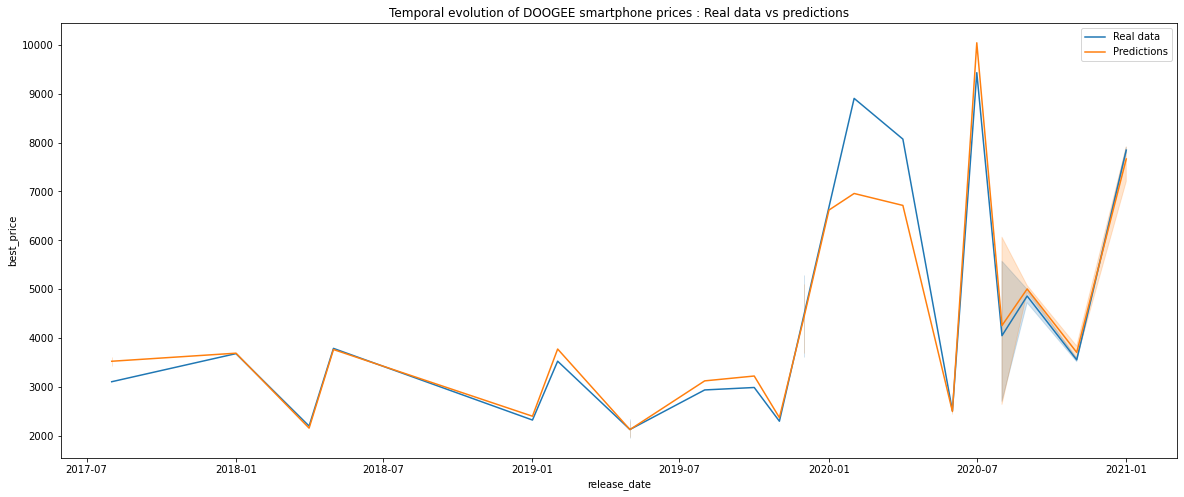

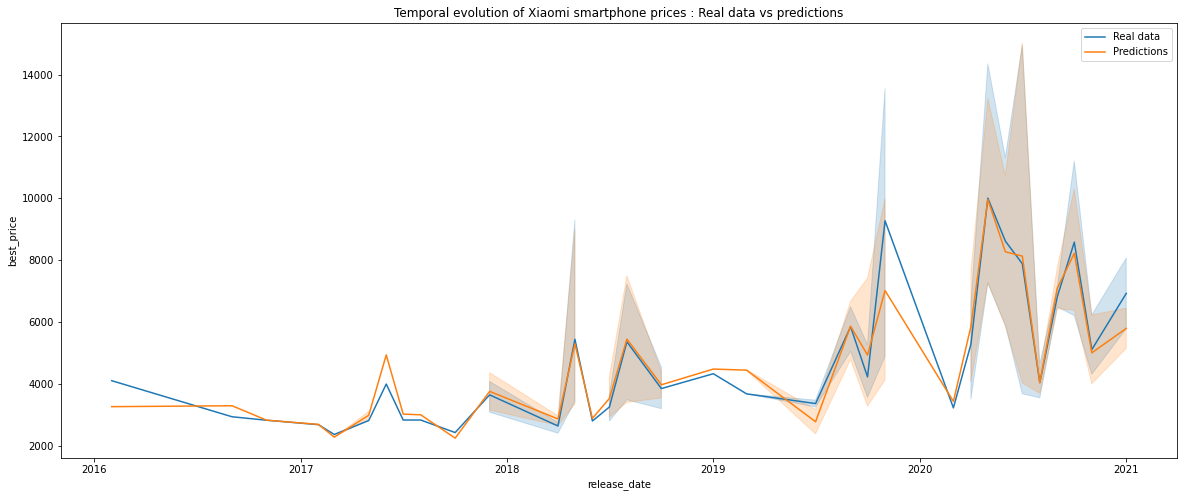

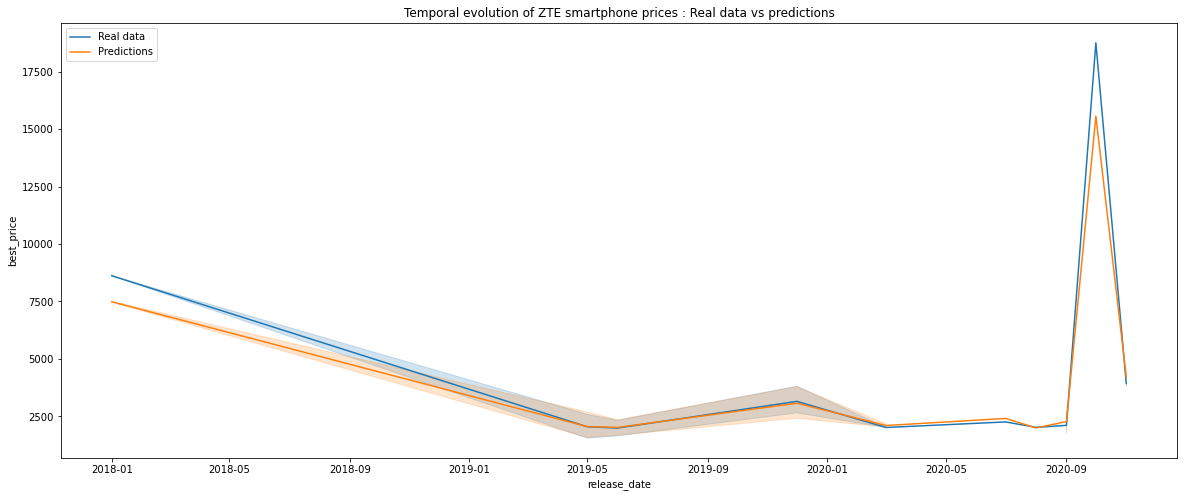

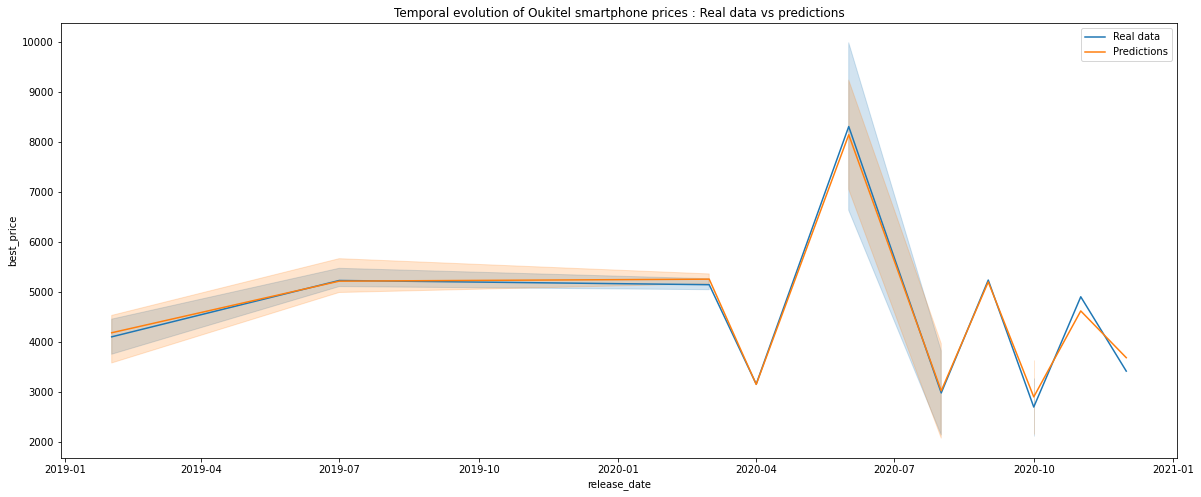

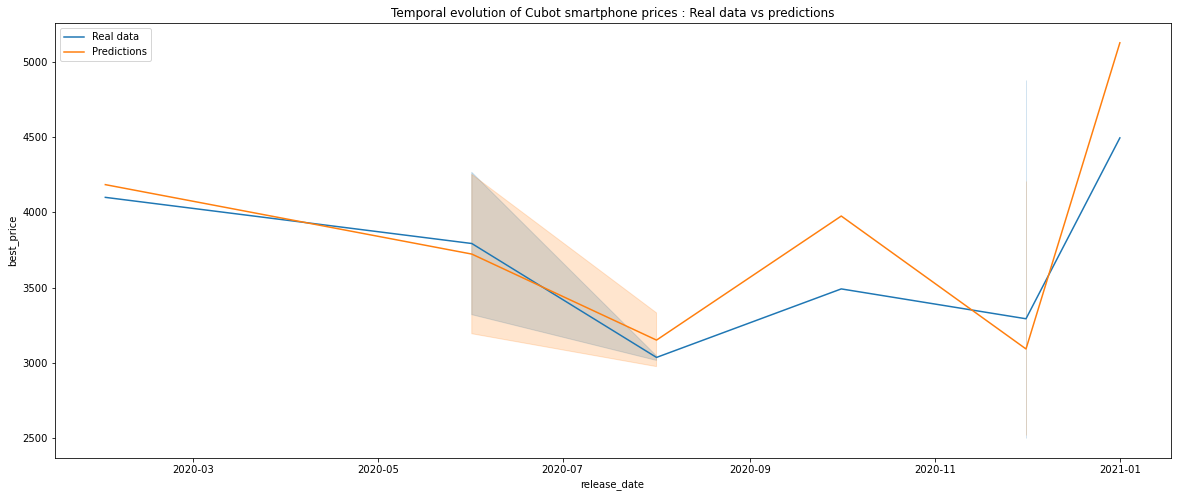

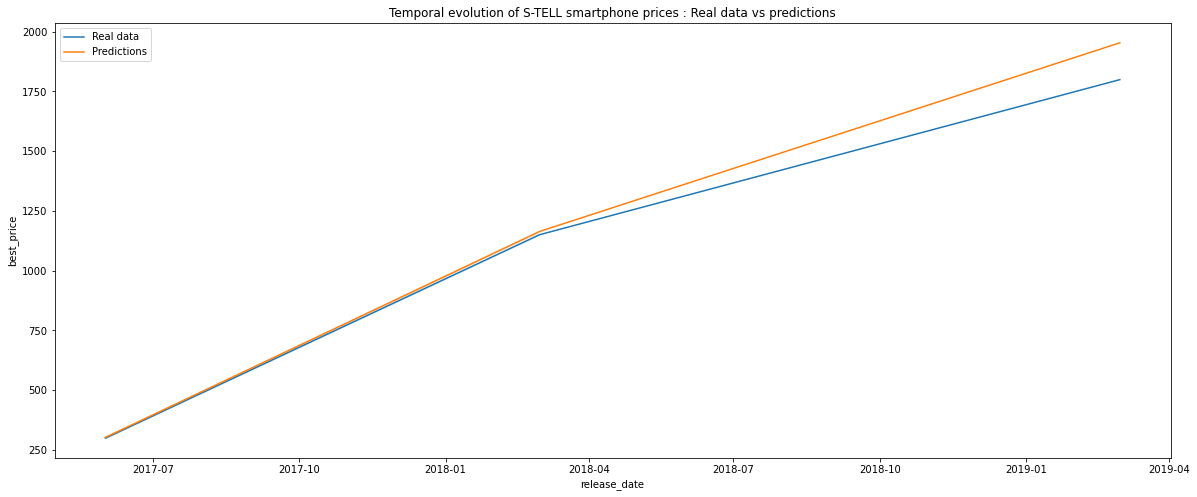

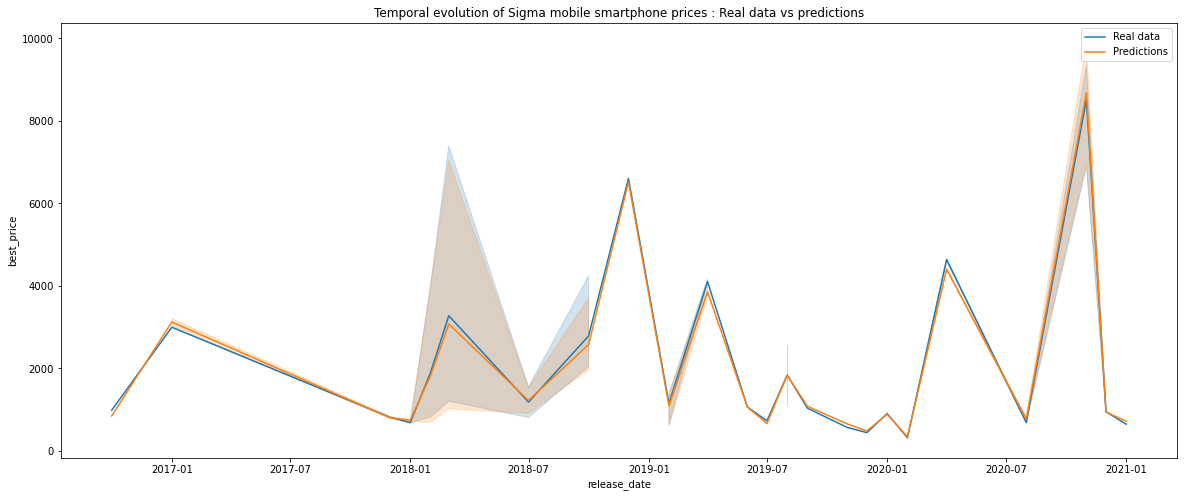

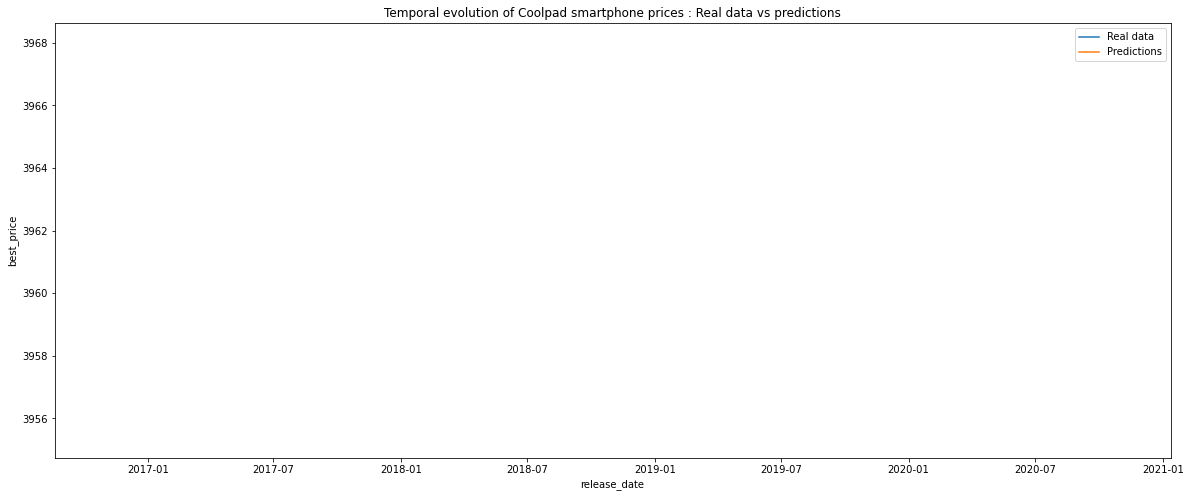

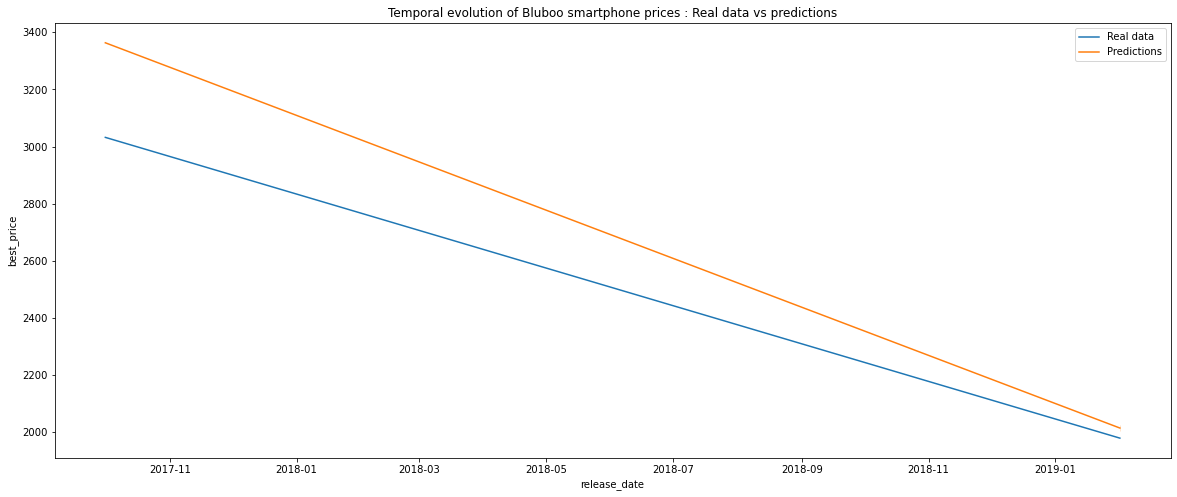

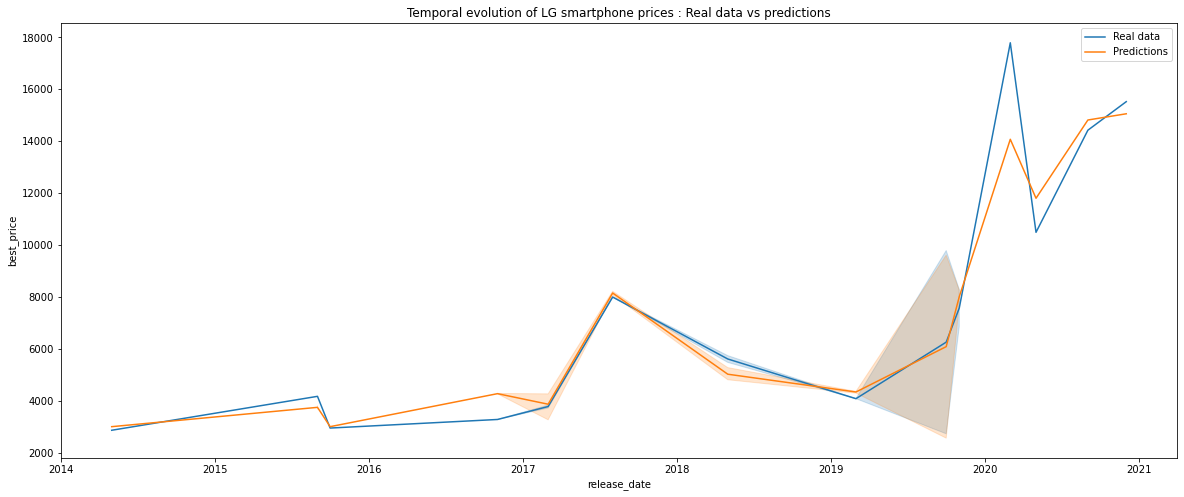

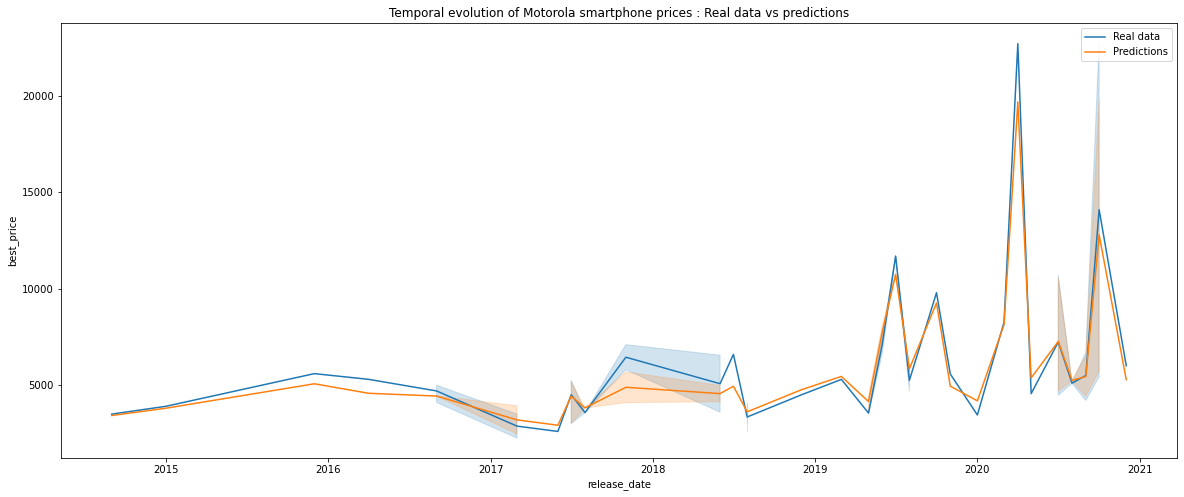

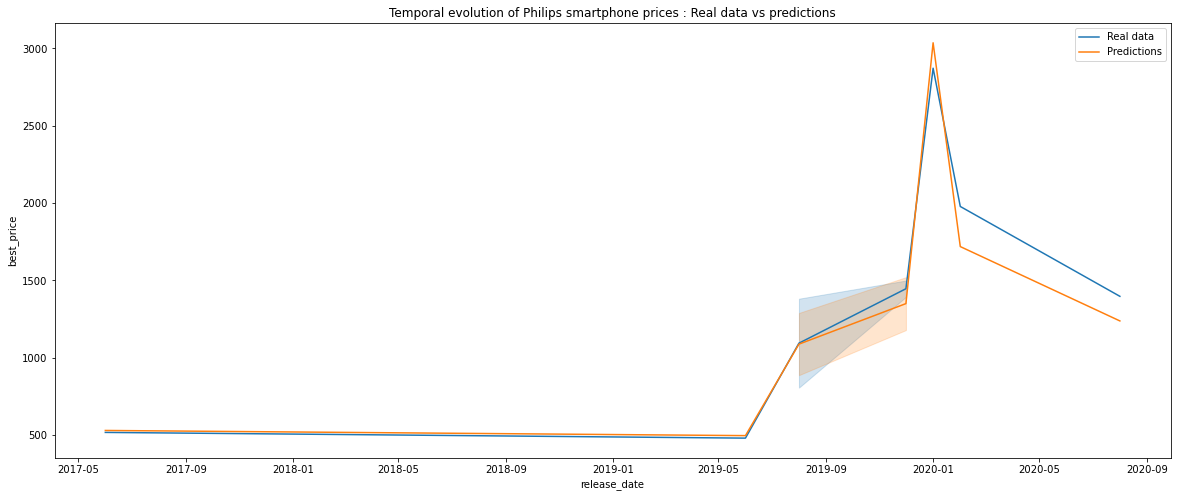

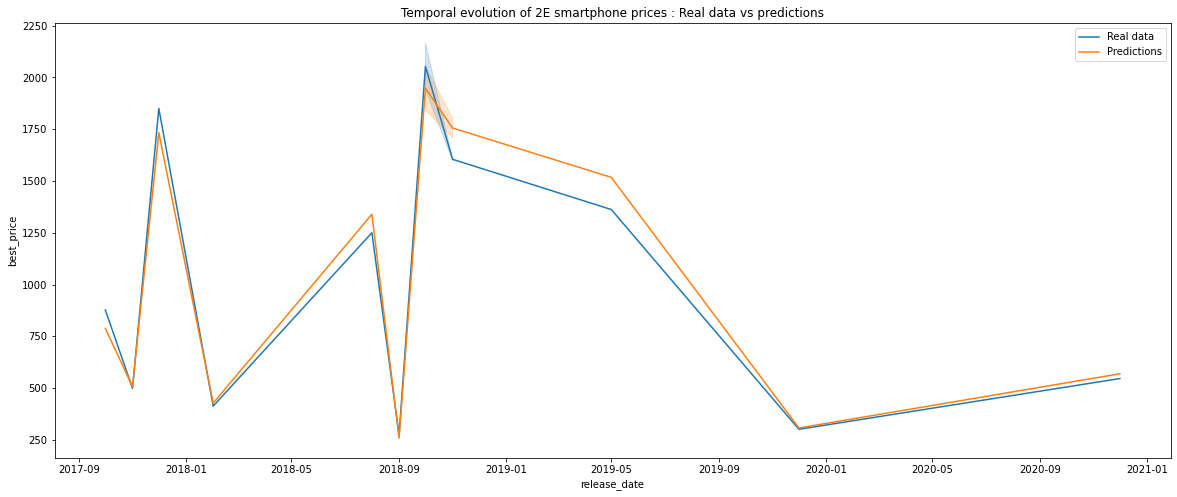

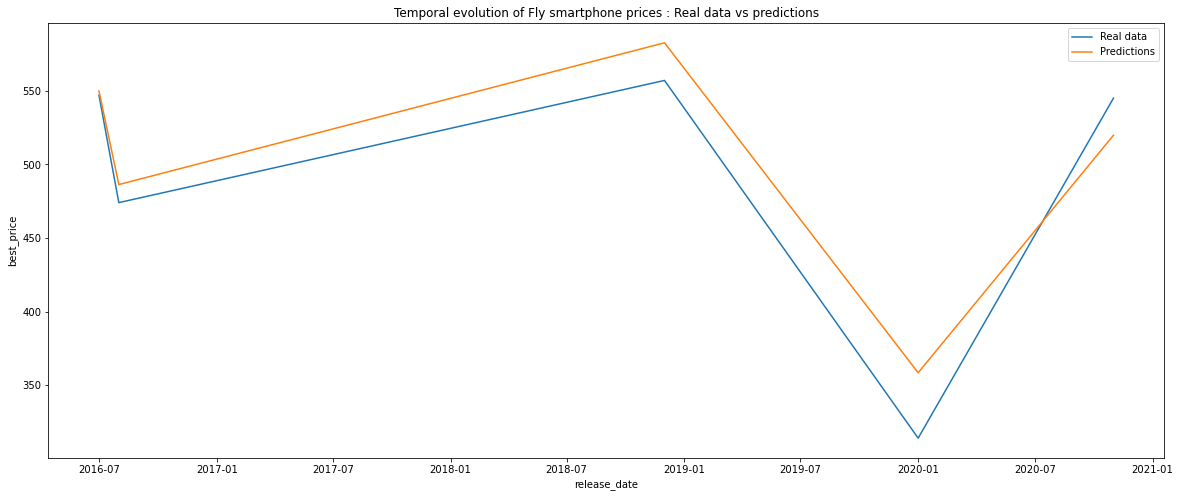

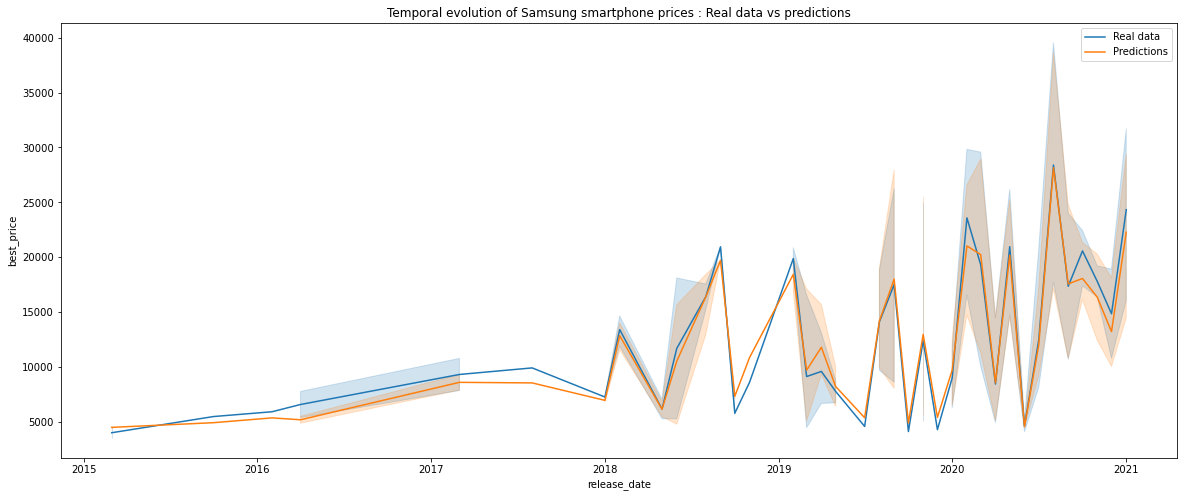

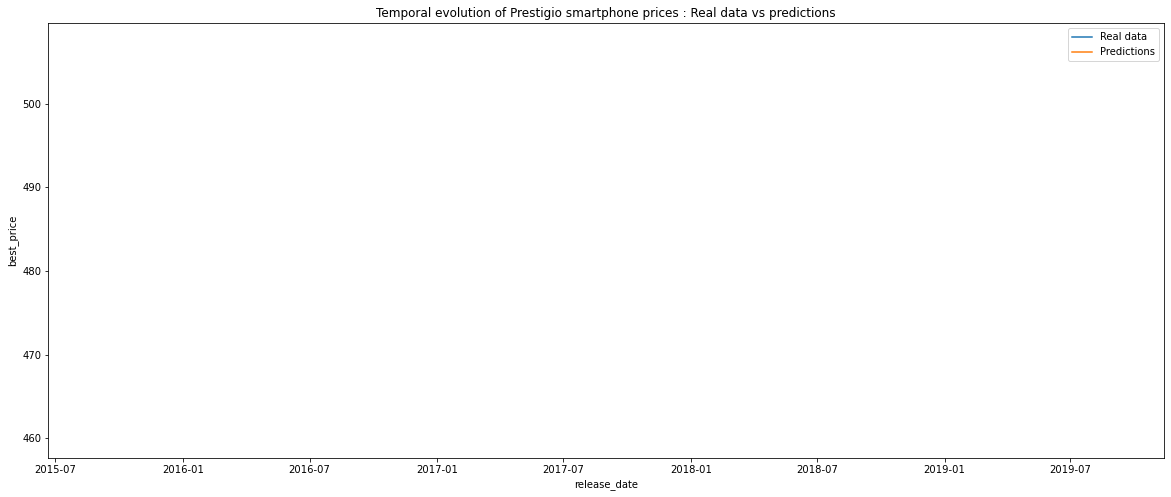

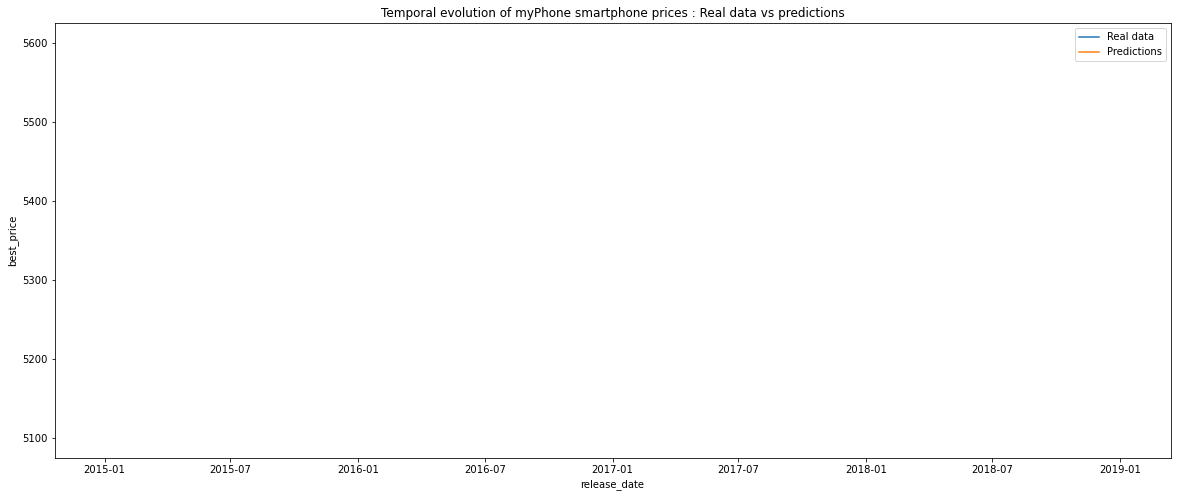

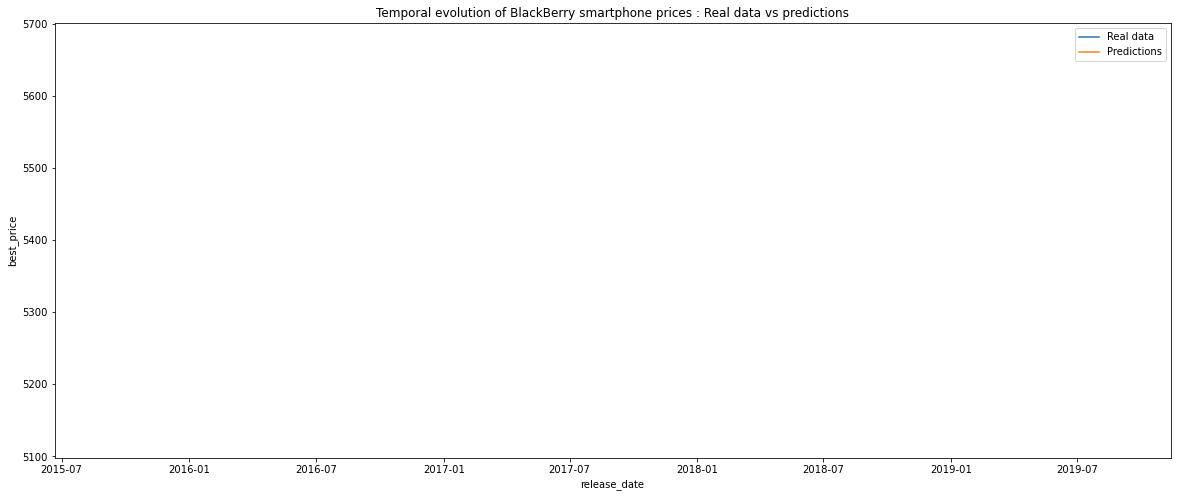

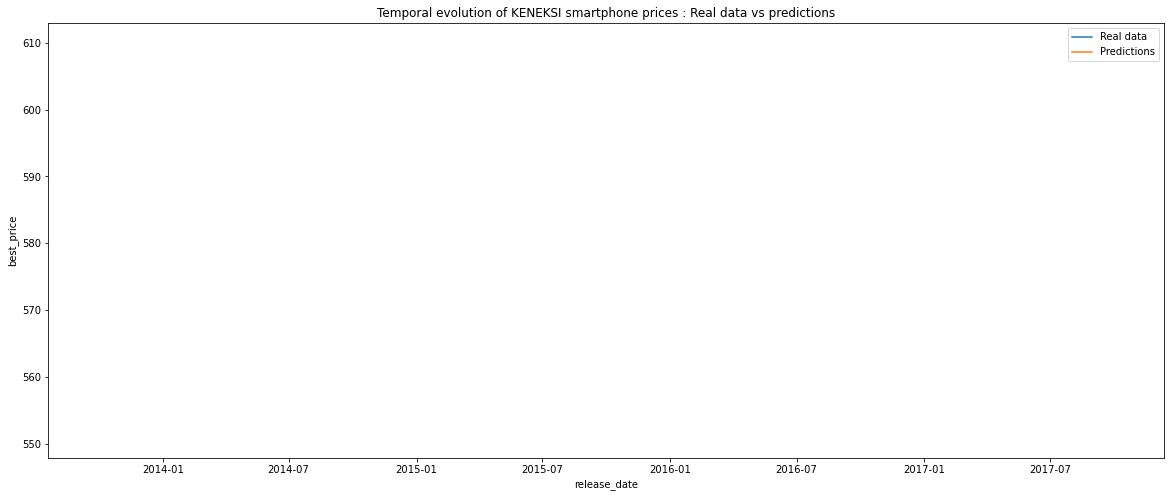

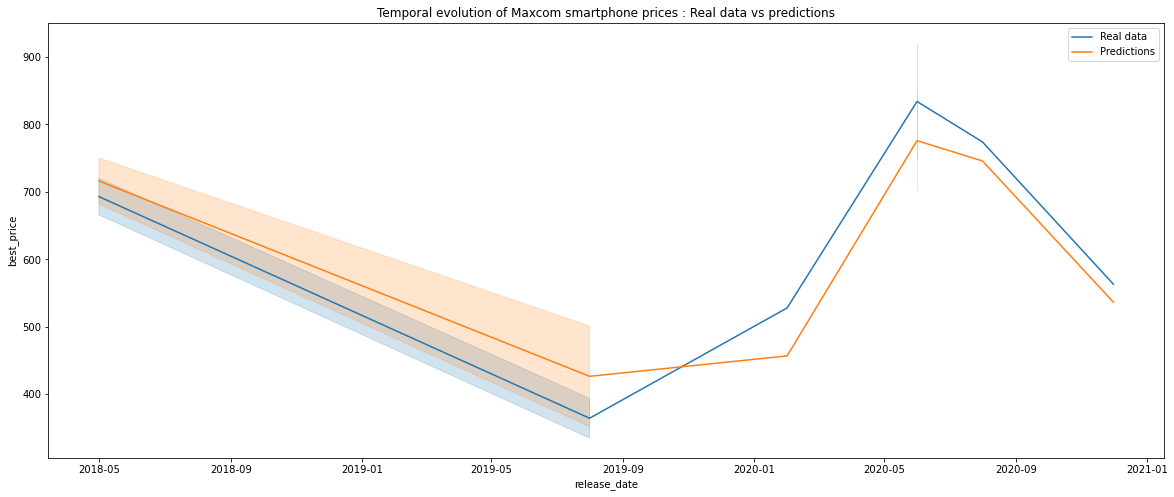

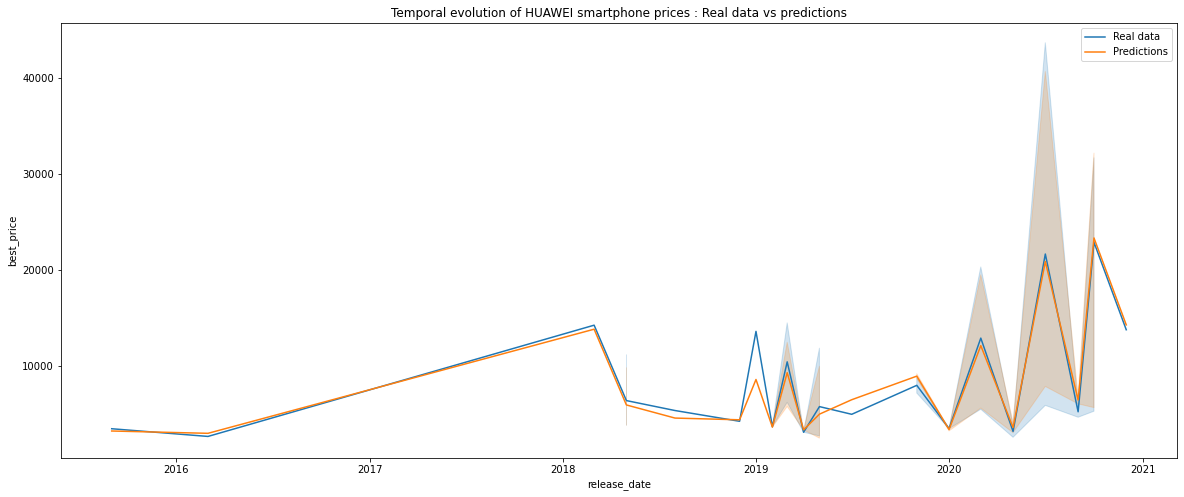

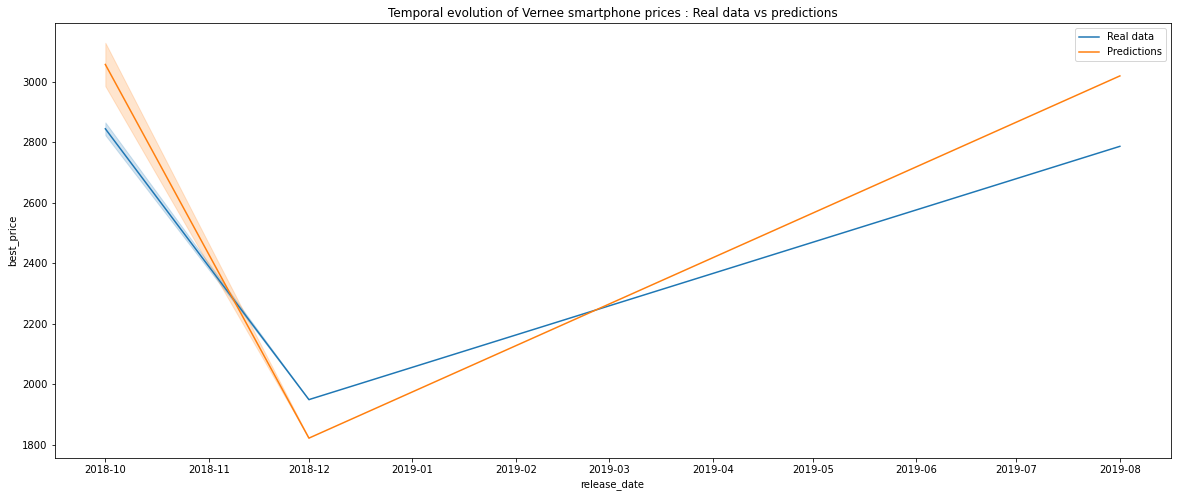

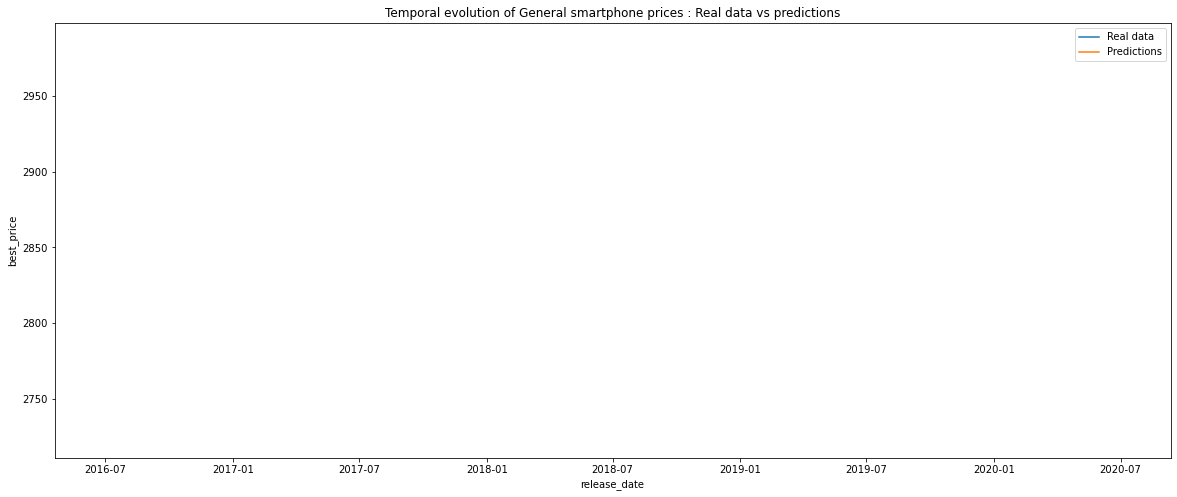

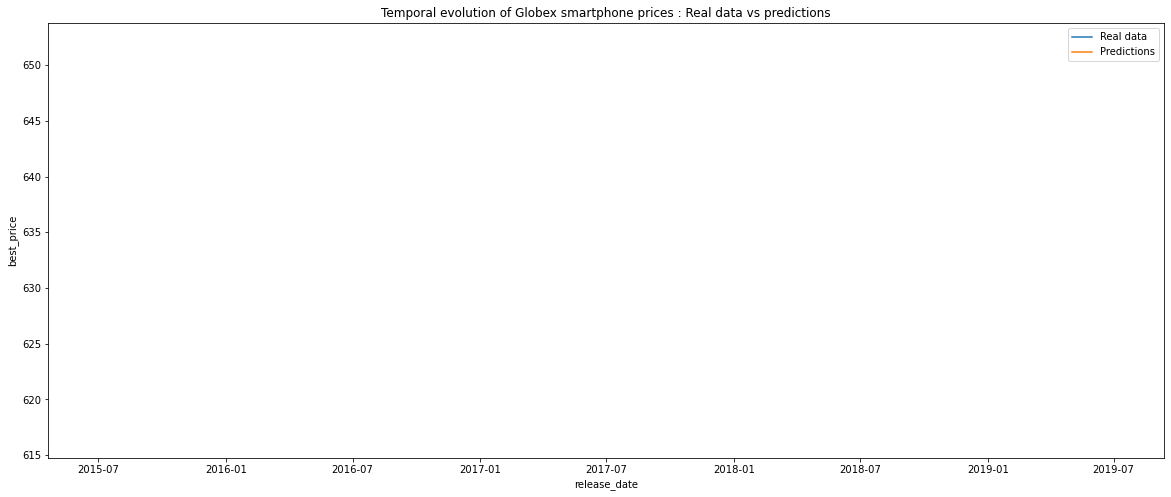

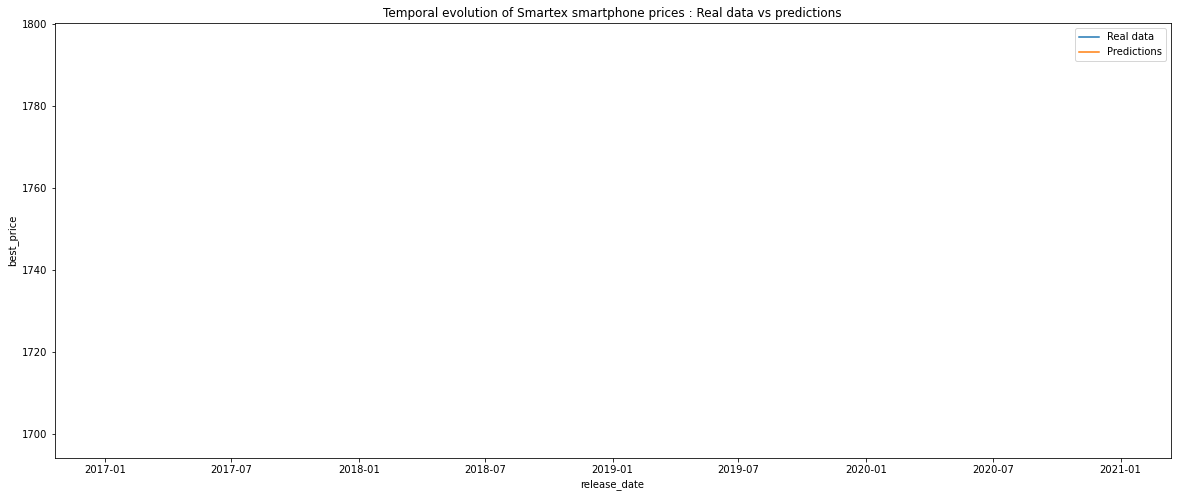

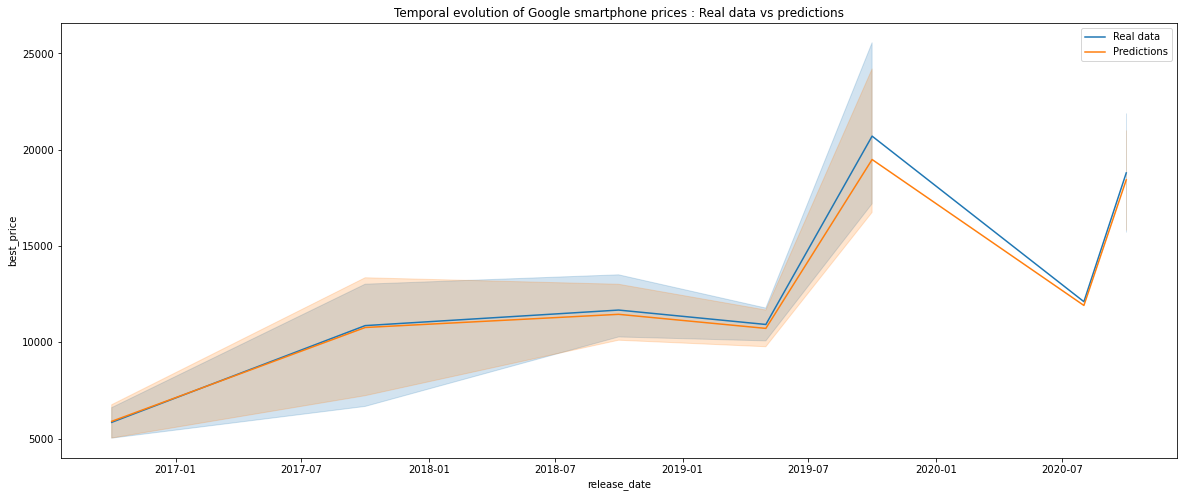

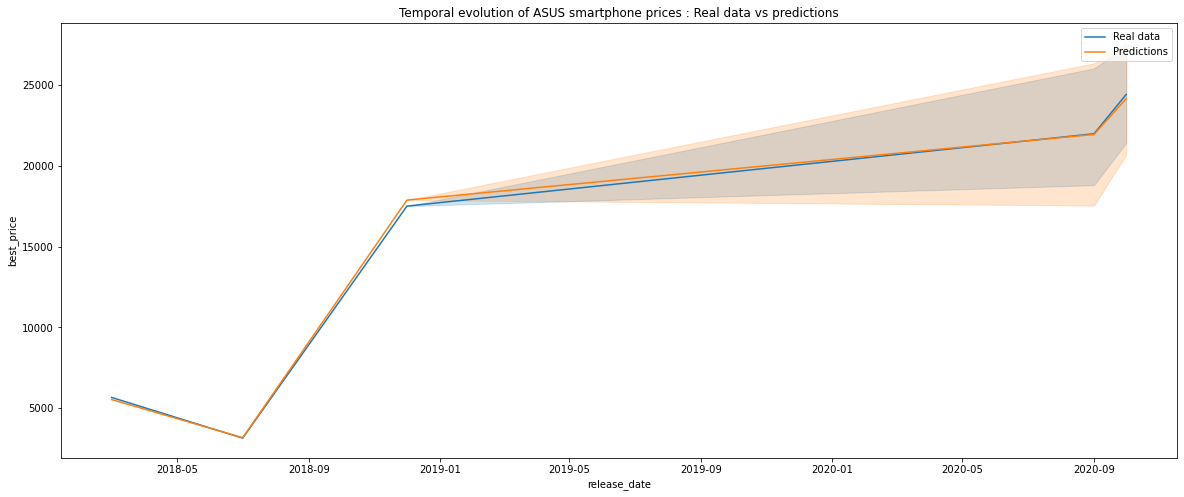

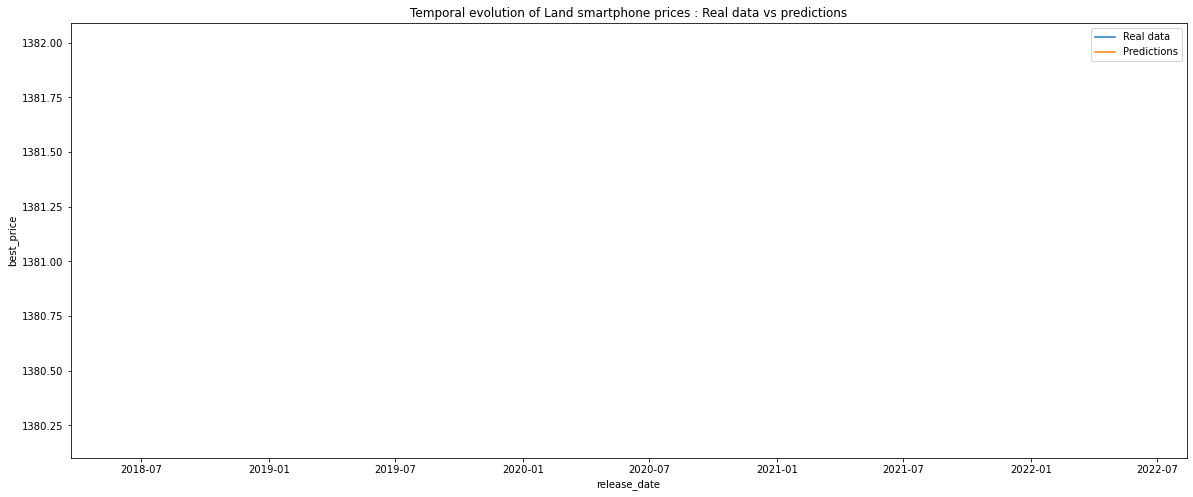

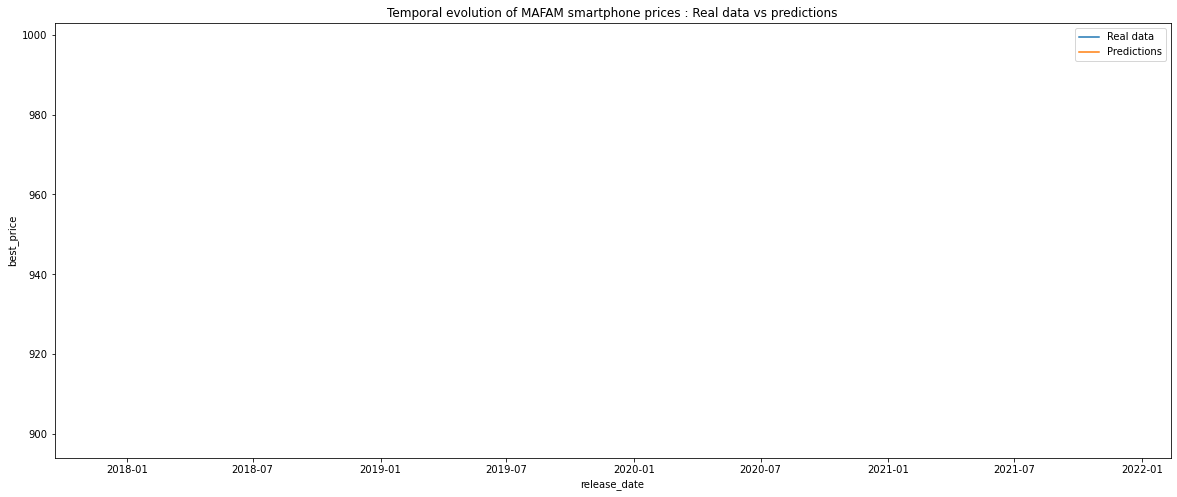

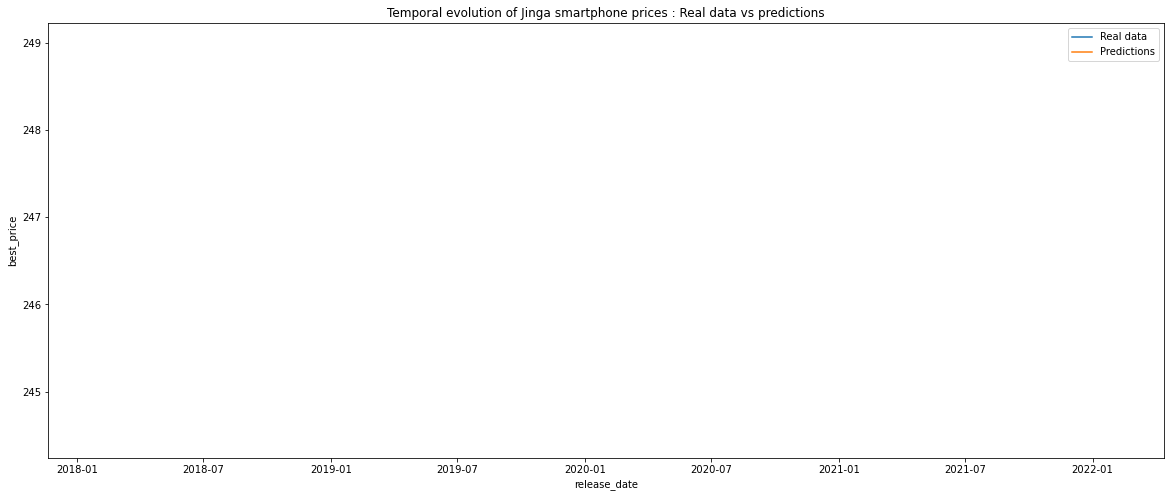

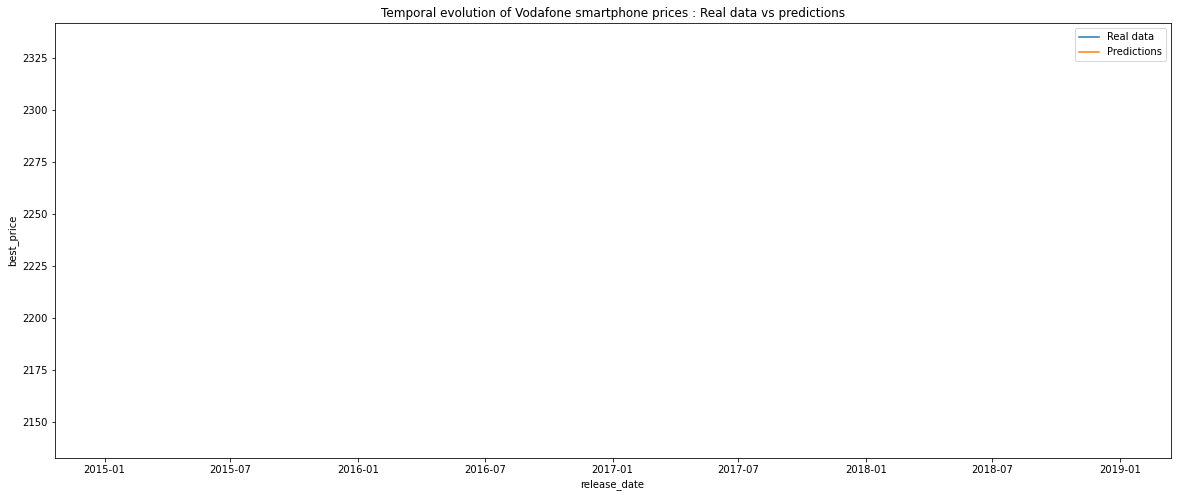

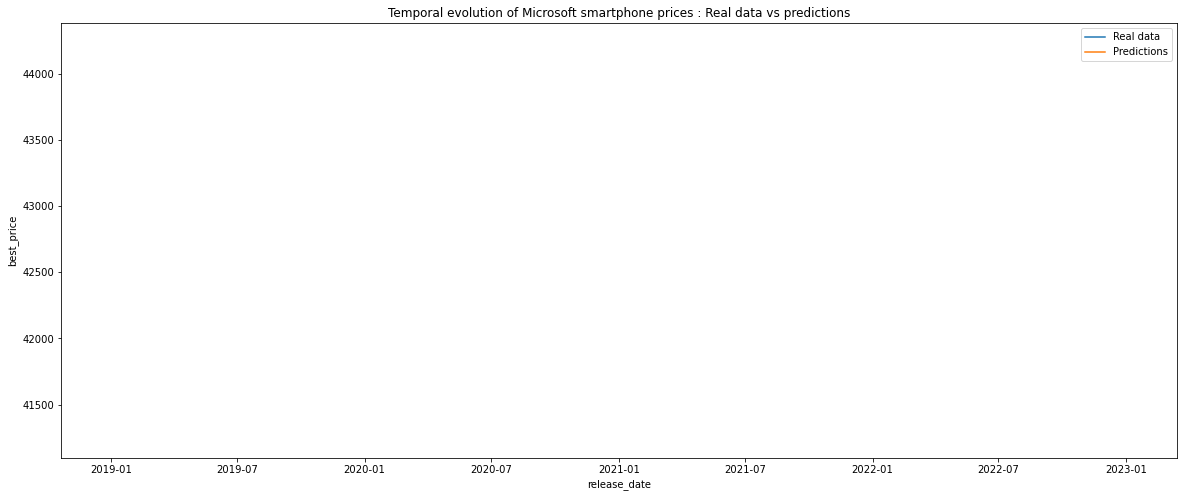

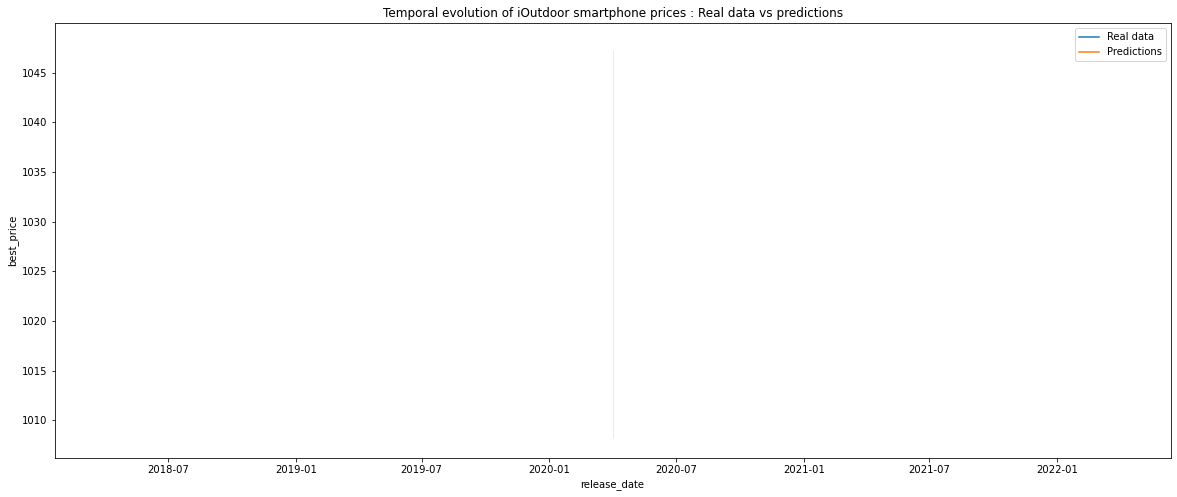

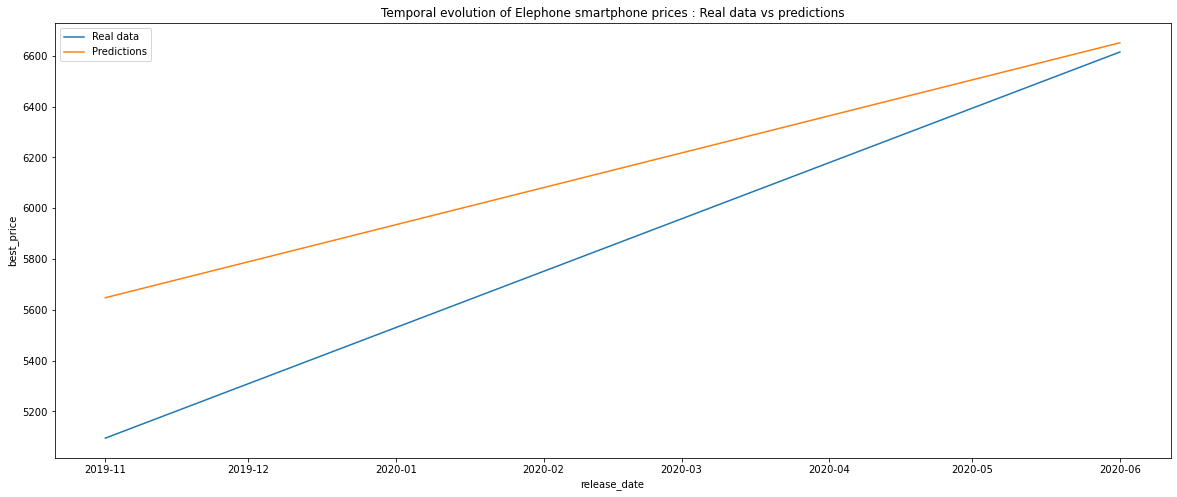

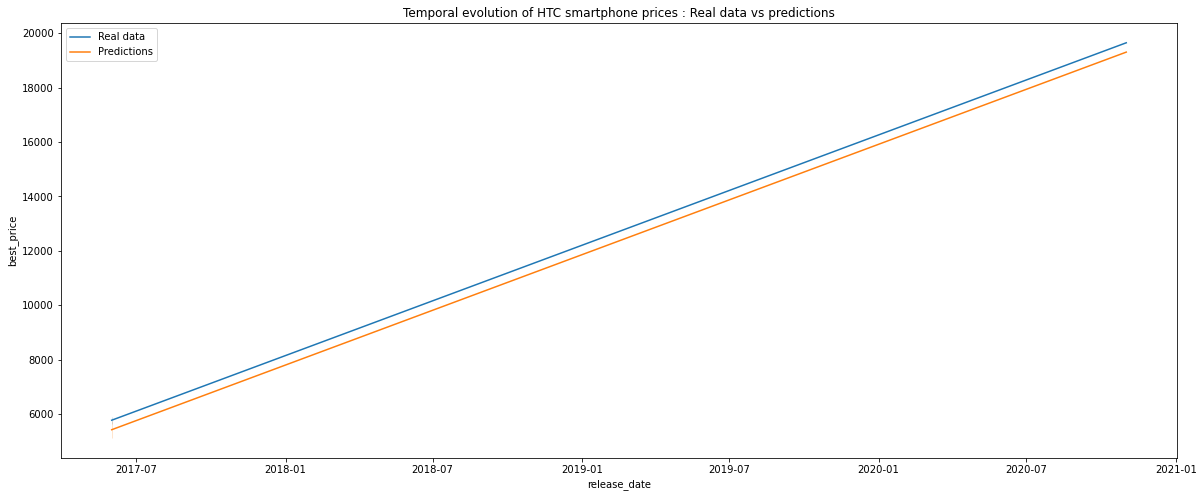

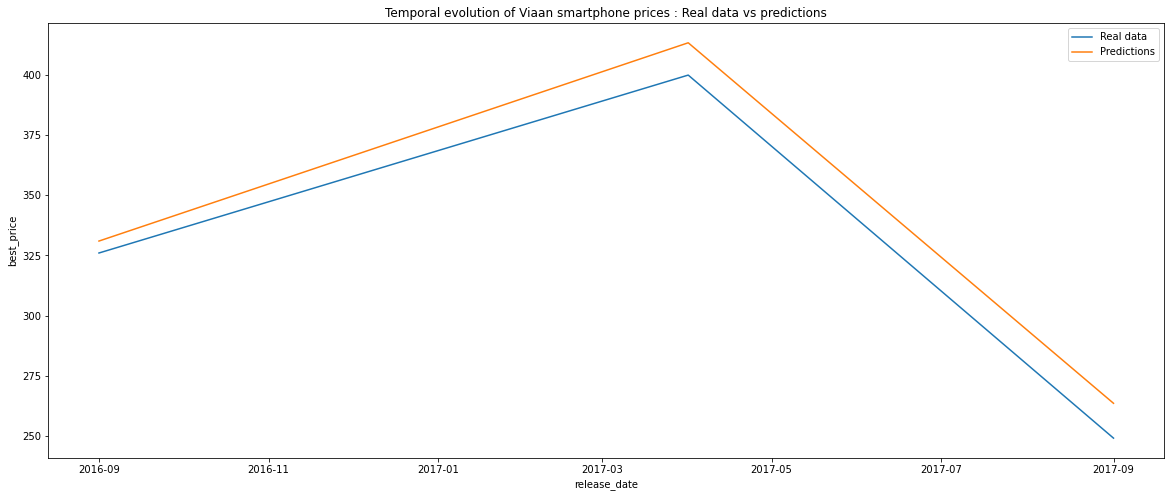

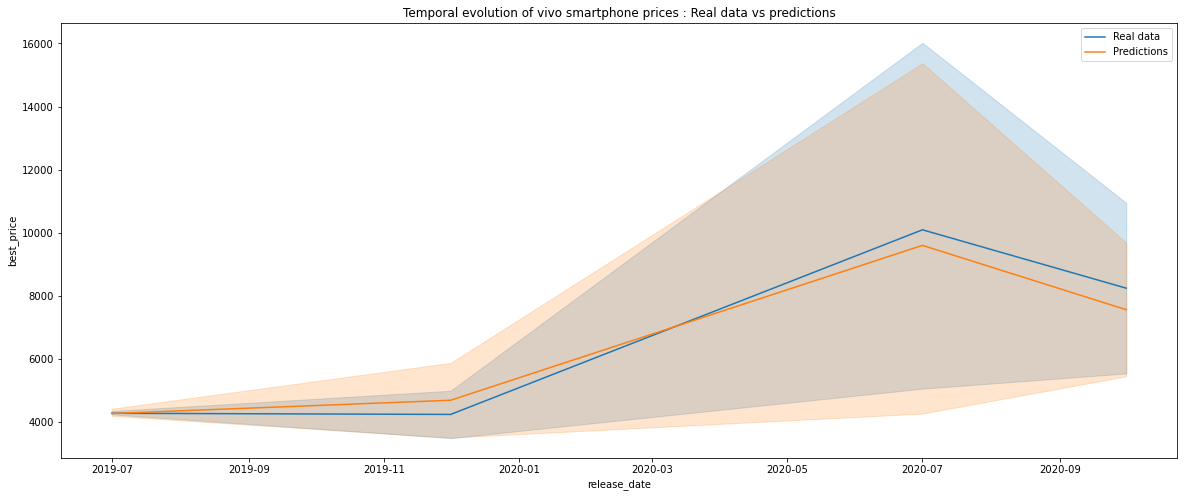

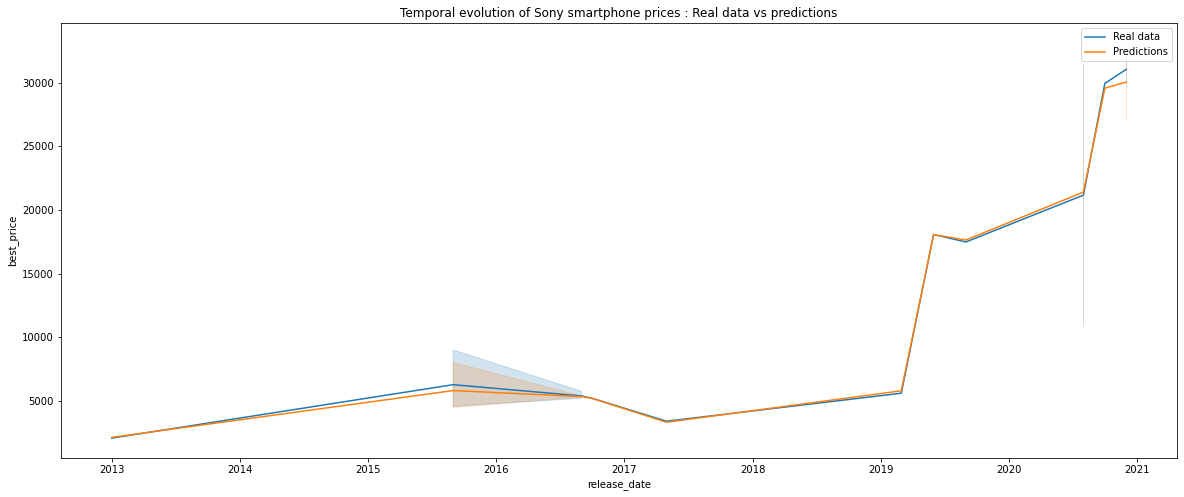

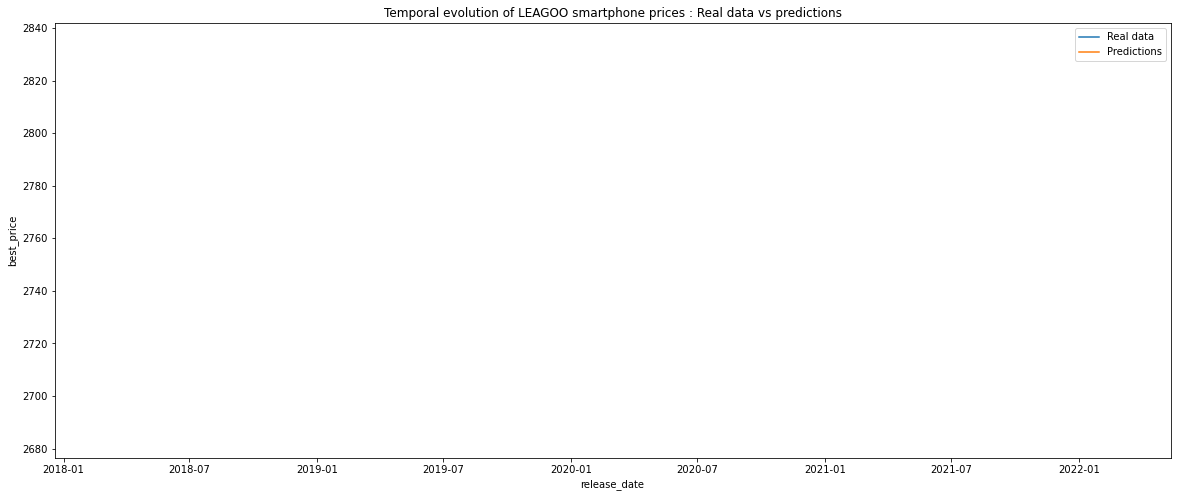

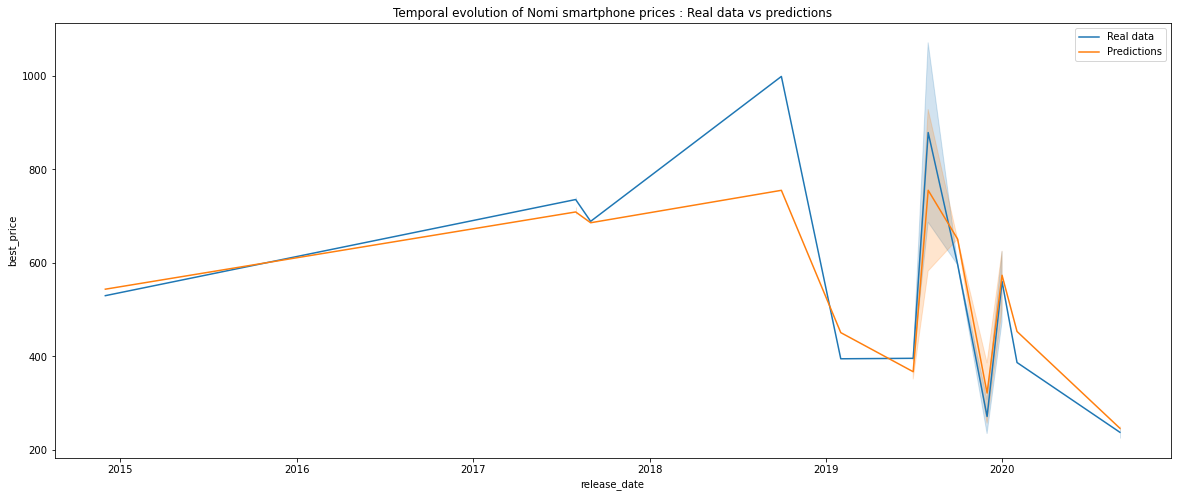

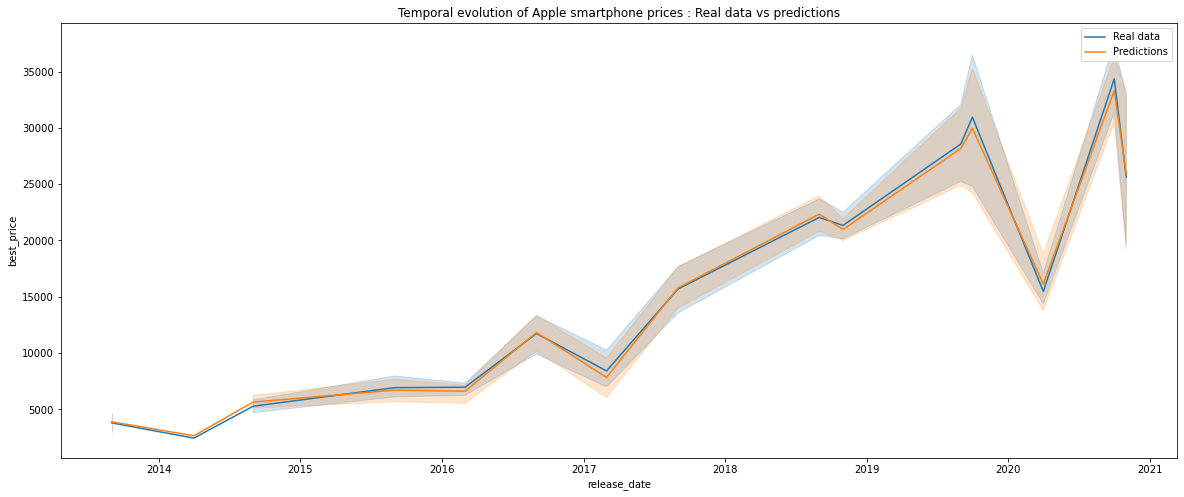

In [45]:
for brand in mobiles.brand_name.unique():
    # Create plot
    plt.figure(figsize=(WIDTH, HEIGHT))
    
    # Filter
    query = f"brand_name=='{brand}'"
    
    # Real data
    sns.lineplot(data=mobiles.query(query), x='release_date', y=TARGET, label="Real data")
    
    # Predictions
    sns.lineplot(x=mobiles.loc[X.index].query(query)['release_date'], y=np.exp(model.predict(X.iloc[mobiles.query(query).index,:])), label="Predictions")
    
    # Display
    plt.title(f"Temporal evolution of {brand} smartphone prices : Real data vs predictions")
    plt.show()

### OLS 

In [48]:

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             best_price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     137.5
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:54:43   Log-Likelihood:                -520.23
No. Observations:                1224   AIC:                             1190.
Df Residuals:                    1149   BIC:                             1574.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     